##### Supplementary Figures for MAS-seq Paper
## Jonn Smith
## 2021 / July / 13

In [97]:
import os
import IPython
from IPython.display import display, display_html, HTML, Markdown

import matplotlib
import matplotlib.pyplot as plt

# Setup any state for libraries or the system:
# Make big figures:
gFIG_SIZE_in = [14, 10]
gPLOT_PARAMS = {
    'legend.fontsize': 'x-large',
    'figure.figsize': gFIG_SIZE_in,
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
matplotlib.rcParams.update(gPLOT_PARAMS)
plt.rcParams.update(gPLOT_PARAMS)

# Bokeh settings:
gBOKEH_SCALE = 80
gFIG_SIZE_px = [gFIG_SIZE_in[0] * gBOKEH_SCALE, gFIG_SIZE_in[1] * gBOKEH_SCALE]
font_sz_units = "pt"
title_font_size = 36
axis_label_font_size = 24
tick_label_font_size = 16
text_font_size = 16

FIG_DIR = "supplementary_figures/"
FIG_NUM = 0
def save_figure(name, fig_dir=FIG_DIR):
    global FIG_NUM
#     plt.gca().set_position([0, 0, 1, 1])
    plt.savefig(f"{fig_dir}/{FIG_NUM:02d}_{name}.svg")
    plt.savefig(f"{fig_dir}/{FIG_NUM:02d}_{name}.png")
    FIG_NUM += 1
    
def save_plotly_figure(fig, name, fig_dir=FIG_DIR):
    global FIG_NUM
    fig.write_image(f"{fig_dir}/{FIG_NUM:02d}_{name}.svg")
    fig.write_image(f"{fig_dir}/{FIG_NUM:02d}_{name}.png")
    FIG_NUM += 1
    
# Make sure we can actually write to FIG_DIR:
os.makedirs(FIG_DIR, exist_ok=True)

def fix_matplotlib_plot_visuals(fig, titlesize, labelsize, ticklabelsize, textsize=None, tight_rect=None):
#     ax = plt.subplot()

    if not textsize:
        textsize = ticklabelsize

    for ax in fig.get_axes():
        
        for ticklabel in (ax.get_xticklabels()):
            ticklabel.set_fontsize(ticklabelsize)
        for ticklabel in (ax.get_yticklabels()):
            ticklabel.set_fontsize(ticklabelsize)
        for c in ax.get_children():
            if c.__class__ == matplotlib.text.Text:
                c.set_fontsize(textsize)

        ax.xaxis.get_label().set_fontsize(labelsize)
        ax.yaxis.get_label().set_fontsize(labelsize)
        ax.title.set_fontsize(titlesize)
    
    for c in fig.get_children():
        if c.__class__ == matplotlib.legend.Legend:
            c.prop.set_size(ticklabelsize)
            c.get_title().set_size(ticklabelsize)
            
    if tight_rect:
        fig.tight_layout(rect=tight_rect)
    else:
        fig.tight_layout()

def printmd(string):
    display(Markdown(string))

def pretty_print_dataframe(df, title=None, rounding_places=2, hide_index=False, raw=False, inline=False):
    def hover(hover_color="#ffff99"):
        return dict(selector="tr:hover",
                    props=[("background-color", "%s" % hover_color)])
    
    table_styles = [
        dict(selector="tr td", props=[("font-size", "12pt")]),
        hover(),
        dict(selector="th", props=[("font-size", "150%"),
                                   ("text-align", "center")])
    ]

    style = df.round(rounding_places).style
    
    if hide_index:
        style = style.hide_index()
    
    if title:
        style = style.set_caption(title)
        
        table_styles.append(
            dict(selector="caption", 
                props=[("text-align", "center"),
                ("font-size", "24pt"),
                ("color", 'black')])
        )
        
    if inline:
        style = style.set_table_attributes("style='display:inline'")
        
    html_string = style.set_table_styles(table_styles).render()
   
    if raw:
        return html_string
    else:
        display(HTML(html_string))

***
# Supplementary Figure 1
## Human Transcriptome Length Statistics vs Sequencing Technologies

In [142]:

def get_field_size(values):
    max_field = -np.inf 
    for f in values:
        if not isinstance(f, list) and not isinstance(f, (list, np.ndarray)):
            if f > max_field:
                max_field = f
    nd = int(np.ceil(np.log10(max_field)))
    return nd

def print_stats(a, label=None):
    
    prec = ".4f"
    int_types = {
        int,
        np.int,
        np.intc,
        np.intp,
        np.int0,
        np.int8,
        np.int16,
        np.int32,
        np.int64,
        np.integer,
        float,
        np.uint,
        np.uintc,
        np.uintp,
        np.uint0,
        np.uint8,
        np.uint16,
        np.uint32,
        np.uint64,
        np.unsignedinteger
    }
    
    quantiles_to_calc = [0.1, 0.25, 0.75, 0.9]
    quantiles = np.quantile(a, quantiles_to_calc)
     
    # Construct our data dictionary in a way that will display our stats in
    # a sensical manner:
    data = {
        "#" : len(a),
        "Min" : np.min(a),
        "Max" : np.max(a),
    }
    for i in range(int(len(quantiles_to_calc)/2)):
        q = quantiles_to_calc[i]
        v = quantiles[i]
        data[f"Q{int(q*100)}"] = v
 
    data["Mean"] = np.mean(a)
    data["Median"] = np.median(a)
    
    for i in range(int(len(quantiles_to_calc)/2), len(quantiles_to_calc)):
        q = quantiles_to_calc[i]
        v = quantiles[i]
        data[f"Q{int(q*100)}"] = v
        
    data["Stdev"] = np.std(a)
    
    nd = get_field_size(data.values())
    
    field_width = max([len(k) for k in data.keys()])
    
    if label:
        print(f"{label}:")
        print("-" * (len(label) + 1))
        
    for k,v in data.items():
        if type(v) in int_types:
            print(f"{k:{field_width}}: {v:{nd}}")
        else:
            nfd = int(np.ceil(np.log10(v)))
            spacer = " " * (nd - nfd)
            print(f"{k:{field_width}}: {spacer}{v:{prec}}")

In [170]:
# Get list of gencode transcript lengths:
import numpy as np
import pysam
from tqdm.notebook import tqdm

tx_file = "/home/jovyan/work/juffowup/references/gencode.v37.transcripts.fa"
transcript_lengths = []
with pysam.FastxFile(tx_file) as f, tqdm(desc=f"Counting all Gencode 37 transcript lengths", unit=" transcript") as pbar:
    for entry in f:
        transcript_lengths.append(len(entry.sequence))
        pbar.update(1)
transcript_lengths = np.array(transcript_lengths)

tx_file = "/home/jovyan/work/juffowup/references/gencode.v37.pc_transcripts.fa"
pc_transcript_lengths = []
with pysam.FastxFile(tx_file) as f, tqdm(desc=f"Counting protein coding Gencode 37 transcript lengths", unit=" transcript") as pbar:
    for entry in f:
        pc_transcript_lengths.append(len(entry.sequence))
        pbar.update(1)
pc_transcript_lengths = np.array(pc_transcript_lengths)

In [174]:
print_stats(transcript_lengths, "Gencode 37 Transcript Lengths")
print()
print()
print_stats(pc_transcript_lengths, "Gencode 37 Protein Coding Transcript Lengths")

Gencode 37 Transcript Lengths:
------------------------------
#     : 234485
Min   :      8
Max   : 347561
Q10   :    402.0000
Q25   :    567.0000
Mean  :   1638.6088
Median:    914.0000
Q75   :   2097.0000
Q90   :   3735.0000
Stdev :   2053.1491


Gencode 37 Protein Coding Transcript Lengths:
---------------------------------------------
#     : 104760
Min   :      8
Max   : 109224
Q10   :    550.0000
Q25   :    722.0000
Mean  :   2263.0098
Median:   1595.0000
Q75   :   2994.2500
Q90   :   4902.0000
Stdev :   2308.4309


In [181]:
# Get the gencode 37 exon lengths: 
import csv 

gencode_gtf = "/home/jovyan/work/juffowup/references/gencode.v37.chr_patch_hapl_scaff.annotation.gtf"

exon_lengths = []
with open(gencode_gtf, "r") as f:
    tsv_file = csv.reader(f, delimiter="\t")
    with tqdm(desc=f"Counting protein coding exons in the Gencode 37 GTF file", unit=" line") as pbar:
        for i, row in enumerate(tsv_file):
            # Ignore comments:
            # Get exon info only:
            if not row[0].startswith("#") and row[2] == "exon":

                # Get our data into a nice dictionary we can query:
                row_data_dict = {
                    field.strip().split(" ")[0].replace('"', ""): field.strip().split(" ")[1].replace('"', "") for
                    field in row[8].split(";") if len(field) != 0
                }
                
                # Filter by transcript_type == "protein_coding":
                if row_data_dict["transcript_type"] == "protein_coding":
                    # Get the length of the exon.
                    # NOTE: We have to add 1 to account for inclusive positions:
                    exon_lengths.append(int(row[4]) - int(row[3]) + 1)
            pbar.update(1)
            
exon_lengths = np.array(exon_lengths)

In [186]:
print_stats(exon_lengths, "Gencode 37 Protein Coding (Transcript) Exon Lengths")

Gencode 37 Protein Coding (Transcript) Exon Lengths:
----------------------------------------------------
#     : 862956
Min   :      1
Max   :  33290
Q10   :     60.0000
Q25   :     88.0000
Mean  :    252.3729
Median:    127.0000
Q75   :    186.0000
Q90   :    356.0000
Stdev :    614.1288


In [ ]:
# Get read lengths from NA12878 data:
# NGS / Short Reads:
# ftp://ftp-trace.ncbi.nih.gov/ReferenceSamples/giab/data/NA12878/NIST_NA12878_HG001_HiSeq_300x/131219_D00360_005_BH814YADXX/Project_RM8398/Sample_U0a/U0a_CGATGT_L001_R1_001.fastq.gz
# Pac Bio Sequel II CCS:
# https://www.ncbi.nlm.nih.gov/sra/SRX7083057[accn] // https://sra-pub-src-2.s3.amazonaws.com/SRR10382246/m64015_190922_010918.fastq.1

In [235]:
# # Make the figure itself:
# fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]})
# handles = []

# bins = 2000
# bins = np.arange(0, np.max([np.max(exon_lengths), np.max(transcript_lengths), np.max(pc_transcript_lengths)]), 5)

# line_style = "-"

# # hist_data, bin_edges = np.histogram(
# #     transcript_lengths, 
# #     bins=bins,
# #     density=False
# # )
# # bin_width = bin_edges[1] - bin_edges[0]
# # h, = ax0.plot(
# #     bin_edges[0:-1] + bin_width,
# #     hist_data,
# #     line_style + "k", 
# #     label=f"Gencode 37 Transcripts"
# # )
# # handles.append(h) 

# ############################

# hist_data, bin_edges = np.histogram(
#     pc_transcript_lengths, 
#     bins=bins,
#     density=False
# )
# bin_width = bin_edges[1] - bin_edges[0]
# h, = ax0.plot(
#     bin_edges[0:-1] + bin_width,
#     hist_data,
#     line_style + "b", 
#     label=f"Gencode 37 PC Transcripts"
# )
# handles.append(h) 
 
# ############################
    
# hist_data, bin_edges = np.histogram(
#     exon_lengths, 
#     bins=bins,
#     density=False
# )
# bin_width = bin_edges[1] - bin_edges[0]
# h, = ax0.plot(
#     bin_edges[0:-1] + bin_width,
#     hist_data,
#     line_style + "g", 
#     label=f"Gencode 37 PC Exons"
# )
# handles.append(h)

# ############################

# # ILMN Read Lengths:
# # minimum = 25
# # maximum = 300
# # body = [100 200]

# # spread = np.random.rand(50) * 100
# # center = np.ones(25) * 50
# # flier_high = np.random.rand(10) * 100 + 100
# # flier_low = np.random.rand(10) * -100
# # data = np.concatenate((spread, center, flier_high, flier_low))

# # Data from: https://www.illumina.com/science/technology/next-generation-sequencing/plan-experiments/read-length.html
# # data = [50, 50, 75, 100, 200, 300]
# # h = ax1.boxplot(
# #     data, 
# #     positions=[1], 
# #     widths = [0.5],
# #     vert=False, 
# #     showfliers=False, 
# #     labels=["Short Reads"]
# # )
# # # handles.append(h)

# # data = [6000, 10000, 20000]
# # h = ax1.boxplot(
# #     data, 
# #     positions=[0], 
# #     widths = [0.5],
# #     vert=False, 
# #     showfliers=False, 
# #     labels=["Long Reads"]
# # )

# r_short = matplotlib.patches.Rectangle((50, 1.5), 550, 1, edgecolor=[0,0,0], facecolor=[1,1,1])
# r_long = matplotlib.patches.Rectangle((5000, 0.5), 15000, 1, edgecolor=[0,0,0], facecolor=[1,1,1])

# ax1.add_patch(r_short)
# ax1.add_patch(r_long)

# ############################

# ax0.set_xscale("log")
# ax0.set_yscale("log")
# ax0.set_title("Supplementary Figure 1:\nHuman Transcriptome Length Statistics")
# ax0.set_ylabel("Count")

# ax1.set_yticks([2,1])
# ax1.set_yticklabels(["Short Reads", "Long Reads"])
# ax1.set_xlabel("Length (bases)")

# a = ax1.axis()
# ax1.axis([a[0], a[1], 0, 3])

# # legend_anchor = (0.5, 0.1)
# fig.legend(
#     handles=handles, 
# #     bbox_to_anchor=legend_anchor, 
# #     loc="upper center", 
#     fancybox=True, 
#     shadow=True,
# #     ncol=3
# )
# fix_matplotlib_plot_visuals(fig, title_font_size, title_font_size, tick_label_font_size, tight_rect=[0,0.15,1,1])
# fff = FIG_NUM
# FIG_NUM=0
# save_figure("Figure_S1_Transcript_Lengths_vs_Sequencing_Technologies")
# FIG_NUM = fff
# fig.show()

~~### Caption~~
~~*top* Histogram of human protein-coding transcript and exon length (as described in Gencode version 37, HG38).  The median protein-coding transcript length is 1595 (+/- 1136) bases.  The median protein-coding exon length is 127 (+/- 49) bases.~~

~~*bottom* Typical read length size for next-generation sequencing instruments (Short Reads - 50-600 bases) and third generation sequencing instruments (Long Reads - 5000 - 20000 bases).  Typical short reads are not long enough to capture the majority of human transcripts.  Typical long read lengths are longer than most complete human transcripts.~~

~~
https://www.illumina.com/content/dam/illumina-marketing/documents/products/appnotes/illumina-dna-pcr-free-insert-size-app-note-770-2020-004.pdf
~~

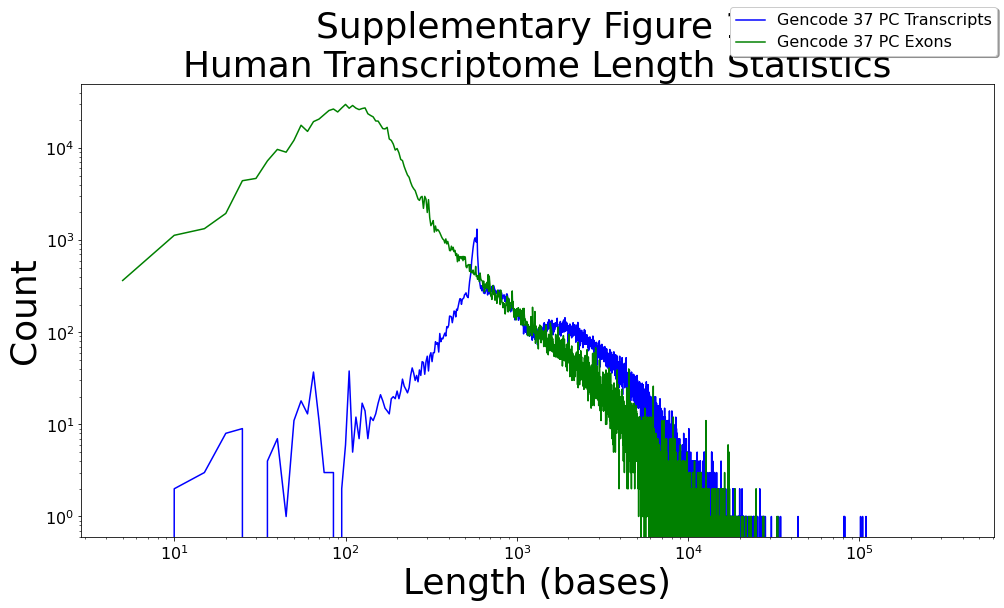

In [237]:
# Make the figure itself:
fig, ax0 = plt.subplots(1, 1)
handles = []

bins = 2000
bins = np.arange(0, np.max([np.max(exon_lengths), np.max(transcript_lengths), np.max(pc_transcript_lengths)]), 5)

line_style = "-"

hist_data, bin_edges = np.histogram(
    pc_transcript_lengths, 
    bins=bins,
    density=False
)
bin_width = bin_edges[1] - bin_edges[0]
h, = ax0.plot(
    bin_edges[0:-1] + bin_width,
    hist_data,
    line_style + "b", 
    label=f"Gencode 37 PC Transcripts"
)
handles.append(h) 
 
############################
    
hist_data, bin_edges = np.histogram(
    exon_lengths, 
    bins=bins,
    density=False
)
bin_width = bin_edges[1] - bin_edges[0]
h, = ax0.plot(
    bin_edges[0:-1] + bin_width,
    hist_data,
    line_style + "g", 
    label=f"Gencode 37 PC Exons"
)
handles.append(h)

############################

ax0.set_xscale("log")
ax0.set_yscale("log")
ax0.set_title("Supplementary Figure 1:\nHuman Transcriptome Length Statistics")
ax0.set_ylabel("Count")
ax0.set_xlabel("Length (bases)")

fig.legend(
    handles=handles, 
    fancybox=True, 
    shadow=True,
)
fix_matplotlib_plot_visuals(fig, title_font_size, title_font_size, tick_label_font_size, tight_rect=[0,0.15,1,1])
fff = FIG_NUM
FIG_NUM=0
save_figure("Figure_S1_Transcript_Lengths_vs_Sequencing_Technologies")
FIG_NUM = fff
fig.show()

### Caption
Histogram of human protein-coding transcript and exon length (as described in Gencode version 37, HG38). The median protein-coding transcript length is 1595 (IQD: 2272.25) bases. The median protein-coding exon length is 127 (IQD: 98) bases.

***
# Supplementary Figure 4
## MAS-seq vs IsoSeq Length (SIRV data)

In [ ]:
# import pickle

# # See also: https://stackoverflow.com/a/1003253
# class CachedOperation:
#     """Context manager class to allow for easily cacheing data."""
    
#     extension = ".pickle"
    
#     def __init__(self, filename, recompute=False, quiet=False):
#         self.filename = filename
#         self.pickle_file = filename + CachedOperation.extension
#         self.quiet = quiet
#         self.recompute = recompute
        
#     def load(self):
#         if not self.quiet:
#             print(f"Loading cached data from Pickle: {os.path.abspath(get_alignment_stats_pickle_filename)} ...", end="\t")
        
#         data = pickle.load(open(self.pickle_file, "rb"))
        
#         if not self.quiet:
#             print("Done!")
        
#         return data
        
#     def cache(self, *argv):
#         print("Pickling aligned_stats ...", end="\t")
#         pickle.dump(argv, open(self.pickle_file, "wb"))
#         print("done!")
        
#     def __enter__(self):
#         print("__enter__")
#         self.fp=open(self.filename,"a+")
#         return self
    
#     def __exit__(self, exc_type, exc_val, exc_tb):
#         print("__exit__")
#         self.fp.close()

In [100]:
isoseq_bam = "/home/jovyan/work/juffowup/covid-19-aziz/SIRV_Data/m64218e_210513_071714.isoseq.reads.bam"
mas_seq_10_bam = "/home/jovyan/work/juffowup/covid-19-aziz/SIRV_Data/SIRV_MAS_15-10x_mas10.reads.bam"
mas_seq_15_bam = "/home/jovyan/work/juffowup/covid-19-aziz/SIRV_Data/SIRV_MAS_15-10x_mas15.reads.bam"

In [118]:
import pickle
def get_read_lengths_and_passes(bam_path, description=""):
    read_lengths = []
    nps = []
    with pysam.AlignmentFile(bam_path, "rb", check_sq=False, require_index=False) as bam_file, tqdm(desc=f"Extracting {description} Read Lengths and Num Passes", unit=" read") as pbar:
        for read in bam_file:
            read_lengths.append(len(read.query_sequence))
            nps.append(read.get_tag("np"))
            pbar.update(1)
    read_lengths = np.array(read_lengths)
    nps = np.array(nps)
    return read_lengths, nps

force_rebuild = False
pickle_ext = ".read_lengths_nps.pickle"

In [123]:
# Get IsoSeq data:
force_rebuild = False
if (not force_rebuild) and os.path.exists(isoseq_bam + pickle_ext):
    print(f"Loading isoseq stats from Pickle ({os.path.abspath(isoseq_bam + pickle_ext)})...", end="\t")
    isoseq_read_lengths, isoseq_nps = pickle.load(open(isoseq_bam + pickle_ext, "rb"))
    print("Done!")
else:
    isoseq_read_lengths, isoseq_nps = get_read_lengths_and_passes(isoseq_bam, "IsoSeq")
    print("Pickling isoseq stats ...", end="\t")
    pickle.dump((isoseq_read_lengths, isoseq_nps), open(isoseq_bam + pickle_ext, "wb"))
    print("done!") 
    
print_stats(isoseq_read_lengths, "IsoSeq Read Lengths")
print()
print_stats(isoseq_nps, "IsoSeq NPs")

Loading isoseq stats from Pickle (/home/jovyan/work/juffowup/covid-19-aziz/SIRV_Data/m64218e_210513_071714.isoseq.reads.bam.read_lengths_nps.pickle)...	Done!
IsoSeq Read Lengths:
--------------------
#     : 6833748
Min   :      44
Max   :  334024
Mean  :    6227.7855
Median:    1154.0000
Stdev :   15567.7143

IsoSeq NPs:
-----------
#     : 6833748
Min   :       0
Max   :    1113
Mean  :      21.4849
Median:       8.0000
Stdev :      26.0558


In [125]:
# Get Mas-seq 10 data:
force_rebuild = False
if (not force_rebuild) and os.path.exists(mas_seq_10_bam + pickle_ext):
    print(f"Loading MAS-10 stats from Pickle ({os.path.abspath(mas_seq_10_bam + pickle_ext)})...", end="\t")
    mas10_read_lengths, mas10_nps = pickle.load(open(mas_seq_10_bam + pickle_ext, "rb"))
    print("Done!")
else:
    mas10_read_lengths, mas10_nps = get_read_lengths_and_passes(mas_seq_10_bam, "MAS-10")
    print("Pickling MAS-10 stats ...", end="\t")
    pickle.dump((mas10_read_lengths, mas10_nps), open(mas_seq_10_bam + pickle_ext, "wb"))
    print("done!")
    
print_stats(mas10_read_lengths, "MAS-seq 10 Read Lengths")
print()
print_stats(mas10_nps, "MAS-seq 10 NPs")

Loading MAS-10 stats from Pickle (/home/jovyan/work/juffowup/covid-19-aziz/SIRV_Data/SIRV_MAS_15-10x_mas10.reads.bam.read_lengths_nps.pickle)...	Done!
MAS-seq 10 Read Lengths:
------------------------
#     : 880950
Min   :     58
Max   :  60000
Mean  :   8463.8611
Median:   7102.0000
Stdev :   7512.7392

MAS-seq 10 NPs:
---------------
#     : 880950
Min   :      0
Max   :    159
Mean  :      9.7457
Median:      5.0000
Stdev :     10.7530


In [126]:
# Get Mas-seq 15 data:
force_rebuild = False
if (not force_rebuild) and os.path.exists(mas_seq_15_bam + pickle_ext):
    print(f"Loading MAS-15 stats from Pickle ({os.path.abspath(mas_seq_15_bam + pickle_ext)})...", end="\t")
    mas15_read_lengths, mas15_nps = pickle.load(open(mas_seq_15_bam + pickle_ext, "rb"))
    print("Done!")
else:
    mas15_read_lengths, mas15_nps = get_read_lengths_and_passes(mas_seq_15_bam, "MAS-15")
    print("Pickling MAS-15 stats ...", end="\t")
    pickle.dump((mas15_read_lengths, mas15_nps), open(mas_seq_15_bam + pickle_ext, "wb"))
    print("done!") 
     
print_stats(mas15_read_lengths, "MAS-seq 15 Read Lengths")
print()
print_stats(mas15_nps, "MAS-seq 15 NPs")

Loading MAS-15 stats from Pickle (/home/jovyan/work/juffowup/covid-19-aziz/SIRV_Data/SIRV_MAS_15-10x_mas15.reads.bam.read_lengths_nps.pickle)...	Done!
MAS-seq 15 Read Lengths:
------------------------
#     : 3496844
Min   :      45
Max   :   60000
Mean  :    9977.0213
Median:    9592.0000
Stdev :    6535.8502

MAS-seq 15 NPs:
---------------
#     : 3496844
Min   :       0
Max   :     983
Mean  :       8.1422
Median:       5.0000
Stdev :       8.6291


In [229]:
# # Make the figure itself:
# fig, (ax0, ax1) = plt.subplots(1, 2)
# handles = []

# n_bins = 1000
# read_length_bins = np.arange(0, np.max([np.max(isoseq_read_lengths), np.max(mas10_read_lengths), np.max(mas15_read_lengths)]), 25)
# np_bins = np.arange(0, np.max([np.max(isoseq_nps), np.max(mas10_nps), np.max(mas15_nps)]), 1)

# ax0_line_s = "-"
# ax1_line_s = "."

# ############################
# ############################
# ############################

# hist_data, bin_edges = np.histogram(
#     isoseq_read_lengths, 
#     bins=read_length_bins,
#     density=False
# )
# bin_width = bin_edges[1] - bin_edges[0]
# h, = ax0.plot(
#     bin_edges[0:-1] + bin_width,
#     hist_data,
#     ax0_line_s + "k", 
#     label=f"IsoSeq"
# )
# handles.append(h)

# ############################

# hist_data, bin_edges = np.histogram(
#     mas10_read_lengths, 
#     bins=read_length_bins,
#     density=False
# )
# bin_width = bin_edges[1] - bin_edges[0]
# h, = ax0.plot(
#     bin_edges[0:-1] + bin_width,
#     hist_data,
#     ax0_line_s + "g", 
#     label=f"MAS-seq 10"
# )
# handles.append(h) 
 
# ############################
    
# hist_data, bin_edges = np.histogram(
#     mas15_read_lengths, 
#     bins=read_length_bins,
#     density=False
# )
# bin_width = bin_edges[1] - bin_edges[0]
# h, = ax0.plot(
#     bin_edges[0:-1] + bin_width,
#     hist_data,
#     ax0_line_s + "b", 
#     label=f"MAS-seq 15"
# )
# handles.append(h)

# ############################
# ############################
# ############################

# hist_data, bin_edges = np.histogram(
#     isoseq_nps, 
#     bins=np_bins,
#     density=False
# )
# bin_width = bin_edges[1] - bin_edges[0]
# h, = ax1.plot(
#     bin_edges[0:-1] + bin_width,
#     hist_data,
#     ax1_line_s + "k", 
#     label=f"IsoSeq"
# )
# # handles.append(h)

# ############################

# hist_data, bin_edges = np.histogram(
#     mas10_nps, 
#     bins=np_bins,
#     density=False
# )
# bin_width = bin_edges[1] - bin_edges[0]
# h, = ax1.plot(
#     bin_edges[0:-1] + bin_width,
#     hist_data,
#     ax1_line_s + "g", 
#     label=f"MAS-seq 10"
# )
# # handles.append(h) 
 
# ############################
    
# hist_data, bin_edges = np.histogram(
#     mas15_nps, 
#     bins=np_bins,
#     density=False
# )
# bin_width = bin_edges[1] - bin_edges[0]
# h, = ax1.plot(
#     bin_edges[0:-1] + bin_width,
#     hist_data,
#     ax1_line_s + "b", 
#     label=f"MAS-seq 15"
# )
# # handles.append(h)

# ############################
# ############################
# ############################

# # ax0.set_xscale("log")
# # ax1.set_xscale("log")

# ax0.set_yscale("log")
# ax1.set_yscale("log")

# a = ax0.axis()
# ax0.axis([0, 30000, a[2], a[3]])
# a = ax1.axis()
# ax1.axis([0, 100, a[2], a[3]])

# # fig.suptitle("Supplementary Figure 4:\nMAS-seq vs IsoSeq Read Characteristics")

# ax0.set_ylabel("Count")

# ax0.set_xlabel("Read Length (bases)")
# ax1.set_xlabel("Number of CCS Passes")

# # legend_anchor = (0.5, 0.1)
# fig.legend(
#     handles=handles, 
# #     bbox_to_anchor=legend_anchor, 
# #     loc="upper center", 
#     fancybox=True, 
#     shadow=True,
# #     ncol=3
# )
# fix_matplotlib_plot_visuals(fig, title_font_size, title_font_size, tick_label_font_size, tight_rect=[0,0.15,1,1])
# save_figure("Figure_S4_MAS-seq_vs_IsoSeq_Read_Lengths_and_Num_Passes")
# fig.show()

In [230]:
# # Same plot but % of total reads:
# # Make the figure itself:
# fig, (ax0, ax1) = plt.subplots(1, 2)
# handles = []

# n_bins = 1000
# read_length_bins = np.arange(0, np.max([np.max(isoseq_read_lengths), np.max(mas10_read_lengths), np.max(mas15_read_lengths)]), 25)
# np_bins = np.arange(0, np.max([np.max(isoseq_nps), np.max(mas10_nps), np.max(mas15_nps)]), 1)

# ax0_line_s = "-"
# ax1_line_s = "-"

# ############################
# ############################
# ############################

# hist_data, bin_edges = np.histogram(
#     isoseq_read_lengths, 
#     bins=read_length_bins,
#     density=False
# ) 
# num_reads = np.sum(hist_data)
# bin_width = bin_edges[1] - bin_edges[0]
# h, = ax0.plot(
#     bin_edges[0:-1] + bin_width,
#     100 * hist_data / num_reads,
#     ax0_line_s + "k", 
#     label=f"IsoSeq"
# )
# handles.append(h)

# ############################

# hist_data, bin_edges = np.histogram(
#     mas10_read_lengths, 
#     bins=read_length_bins,
#     density=False
# )
# num_reads = np.sum(hist_data)
# bin_width = bin_edges[1] - bin_edges[0]
# h, = ax0.plot(
#     bin_edges[0:-1] + bin_width,
#     100 * hist_data / num_reads,
#     ax0_line_s + "g", 
#     label=f"MAS-seq 10"
# )
# handles.append(h) 
 
# ############################
    
# hist_data, bin_edges = np.histogram(
#     mas15_read_lengths, 
#     bins=read_length_bins,
#     density=False
# )
# num_reads = np.sum(hist_data)
# bin_width = bin_edges[1] - bin_edges[0]
# h, = ax0.plot(
#     bin_edges[0:-1] + bin_width,
#     100 * hist_data / num_reads,
#     ax0_line_s + "b", 
#     label=f"MAS-seq 15"
# )
# handles.append(h)

# ############################
# ############################
# ############################

# hist_data, bin_edges = np.histogram(
#     isoseq_nps, 
#     bins=np_bins,
#     density=False
# )
# num_reads = np.sum(hist_data)
# bin_width = bin_edges[1] - bin_edges[0]
# h, = ax1.plot(
#     bin_edges[0:-1] + bin_width,
#     100 * hist_data / num_reads,
#     ax1_line_s + "k", 
#     label=f"IsoSeq"
# )
# # handles.append(h)

# ############################

# hist_data, bin_edges = np.histogram(
#     mas10_nps, 
#     bins=np_bins,
#     density=False
# )
# num_reads = np.sum(hist_data)
# bin_width = bin_edges[1] - bin_edges[0]
# h, = ax1.plot(
#     bin_edges[0:-1] + bin_width,
#     100 * hist_data / num_reads,
#     ax1_line_s + "g", 
#     label=f"MAS-seq 10"
# )
# # handles.append(h) 
 
# ############################
    
# hist_data, bin_edges = np.histogram(
#     mas15_nps, 
#     bins=np_bins,
#     density=False
# )
# num_reads = np.sum(hist_data)
# bin_width = bin_edges[1] - bin_edges[0]
# h, = ax1.plot(
#     bin_edges[0:-1] + bin_width,
#     100 * hist_data / num_reads,
#     ax1_line_s + "b", 
#     label=f"MAS-seq 15"
# )
# # handles.append(h)

# ############################
# ############################
# ############################

# # ax0.set_xscale("log")
# # ax1.set_xscale("log")

# # ax0.set_yscale("log")
# # ax1.set_yscale("log")

# a = ax0.axis()
# ax0.axis([0, 30000, a[2], a[3]])
# a = ax1.axis()
# ax1.axis([0, 100, a[2], a[3]])

# ax0.set_ylabel("Percent of Total")

# ax0.set_xlabel("Read Length (bases)")
# ax1.set_xlabel("Number of CCS Passes")

# # legend_anchor = (0.5, 0.1)
# fig.legend(
#     handles=handles, 
# #     bbox_to_anchor=legend_anchor, 
# #     loc="upper center", 
#     fancybox=True, 
#     shadow=True,
# #     ncol=3
# )
# fix_matplotlib_plot_visuals(fig, title_font_size, title_font_size, tick_label_font_size, tight_rect=[0,0.15,1,1])
# save_figure("Figure_S4b_MAS-seq_vs_IsoSeq_Read_Lengths_and_Num_Passes_Percents")
# fig.show()

Read Lengths
IsoSeq 80% < 3596 [3595.629730547983 indx = 143, counts[indx] = 80.00844924460915]
MAS 10 80% < 8139 [8139.230481416813 indx = 324, counts[indx] = 80.19603836767126]
MAS 15 80% < 11255 [11255.468134257371 indx = 450, counts[indx] = 80.32883365686317]

# CCS Passes
IsoSeq 80% < 57 [56.71295748571946 indx = 57, counts[indx] = 80.18603849396239]
MAS 10 80% < 21 [20.846137873754152 indx = 21, counts[indx] = 80.25234122254385]
MAS 15 80% < 16 [16.086593368763044 indx = 17, counts[indx] = 82.42804082767204]


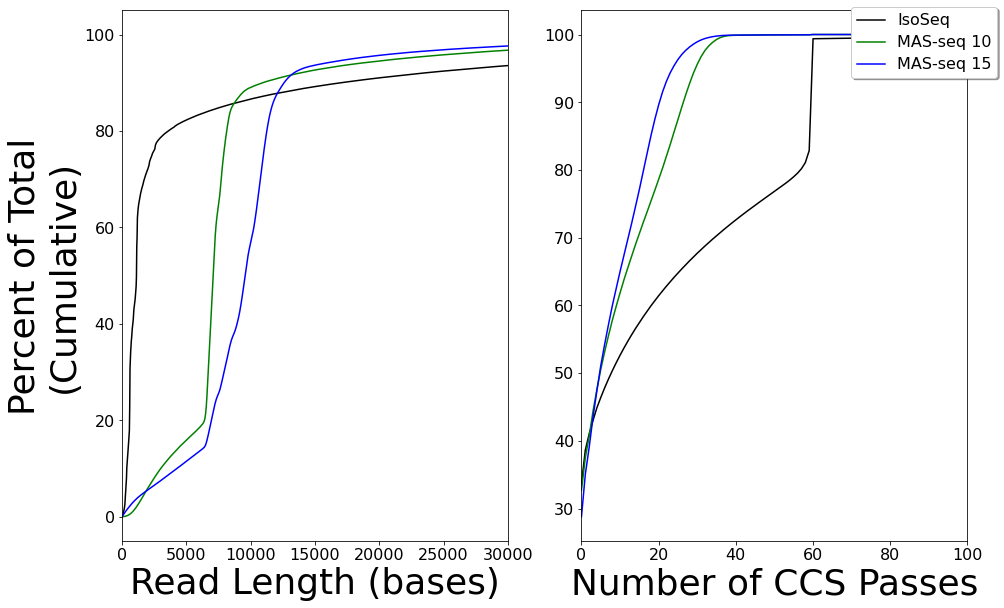

In [231]:
# Same plot but density:

# Same plot but % of total reads:
# Make the figure itself:
fig, (ax0, ax1) = plt.subplots(1, 2)
handles = []

n_bins = 1000
read_length_bins = np.arange(0, np.max([np.max(isoseq_read_lengths), np.max(mas10_read_lengths), np.max(mas15_read_lengths)]), 25)
np_bins = np.arange(0, np.max([np.max(isoseq_nps), np.max(mas10_nps), np.max(mas15_nps)]), 1)

ax0_line_s = "-"
ax1_line_s = "-"

target=80

############################
############################
############################

print("Read Lengths")
print("============")
hist_data, bin_edges = np.histogram(
    isoseq_read_lengths, 
    bins=read_length_bins,
    density=False
) 
num_reads = np.sum(hist_data)

# Only plot the data where we have data:
counts = (np.cumsum(hist_data[hist_data > 0]) / num_reads) * 100.0
bins = bin_edges[:-1][hist_data > 0]

# Note the comma here.  That is required.
h, = ax0.plot(
    bins, 
    counts,
    ax0_line_s + "k", 
    label=f"IsoSeq"
)
handles.append(h)

indx = np.argmax(counts > target)
val = np.interp([target], counts[indx-1:indx+1], bins[indx-1:indx+1])[0]
print(f"IsoSeq {target}% < {int(np.around(val))} [{val} indx = {indx}, counts[indx] = {counts[indx]}]")

############################

hist_data, bin_edges = np.histogram(
    mas10_read_lengths, 
    bins=read_length_bins,
    density=False
)
num_reads = np.sum(hist_data)
          
# Only plot the data where we have data:
counts = (np.cumsum(hist_data[hist_data > 0]) / num_reads) * 100.0
bins = bin_edges[:-1][hist_data > 0]

# Note the comma here.  That is required.
h, = ax0.plot(
    bins, 
    counts,
    ax0_line_s + "g", 
    label=f"MAS-seq 10"
)
handles.append(h) 

indx = np.argmax(counts > target)
val = np.interp([target], counts[indx-1:indx+1], bins[indx-1:indx+1])[0]
print(f"MAS 10 {target}% < {int(np.around(val))} [{val} indx = {indx}, counts[indx] = {counts[indx]}]")
 
############################
    
hist_data, bin_edges = np.histogram(
    mas15_read_lengths, 
    bins=read_length_bins,
    density=False
)
num_reads = np.sum(hist_data)
          
# Only plot the data where we have data:
counts = (np.cumsum(hist_data[hist_data > 0]) / num_reads) * 100.0
bins = bin_edges[:-1][hist_data > 0]

# Note the comma here.  That is required.
h, = ax0.plot(
    bins, 
    counts,
    ax0_line_s + "b", 
    label=f"MAS-seq 15"
)
handles.append(h)

indx = np.argmax(counts > target)
val = np.interp([target], counts[indx-1:indx+1], bins[indx-1:indx+1])[0]
print(f"MAS 15 {target}% < {int(np.around(val))} [{val} indx = {indx}, counts[indx] = {counts[indx]}]")

############################
############################
############################

print()
print("# CCS Passes")
print("============")

hist_data, bin_edges = np.histogram(
    isoseq_nps, 
    bins=np_bins,
    density=False
)
num_reads = np.sum(hist_data)
          
# Only plot the data where we have data:
counts = (np.cumsum(hist_data[hist_data > 0]) / num_reads) * 100.0
bins = bin_edges[:-1][hist_data > 0]

# Note the comma here.  That is required.
h, = ax1.plot(
    bins, 
    counts,
    ax1_line_s + "k", 
    label=f"IsoSeq"
)
# handles.append(h)

indx = np.argmax(counts > target)
val = np.interp([target], counts[indx-1:indx+1], bins[indx-1:indx+1])[0]
print(f"IsoSeq {target}% < {int(np.around(val))} [{val} indx = {indx}, counts[indx] = {counts[indx]}]")

############################

hist_data, bin_edges = np.histogram(
    mas10_nps, 
    bins=np_bins,
    density=False
)
num_reads = np.sum(hist_data)
# Only plot the data where we have data:
counts = (np.cumsum(hist_data[hist_data > 0]) / num_reads) * 100.0
bins = bin_edges[:-1][hist_data > 0]

# Note the comma here.  That is required.
h, = ax1.plot(
    bins, 
    counts,
    ax1_line_s + "g", 
    label=f"MAS-seq 10"
)
# handles.append(h) 

indx = np.argmax(counts > target)
val = np.interp([target], counts[indx-1:indx+1], bins[indx-1:indx+1])[0]
print(f"MAS 10 {target}% < {int(np.around(val))} [{val} indx = {indx}, counts[indx] = {counts[indx]}]")
 
############################
    
hist_data, bin_edges = np.histogram(
    mas15_nps, 
    bins=np_bins,
    density=False
)
num_reads = np.sum(hist_data)
# Only plot the data where we have data:
counts = (np.cumsum(hist_data[hist_data > 0]) / num_reads) * 100.0
bins = bin_edges[:-1][hist_data > 0]

# Note the comma here.  That is required.
h, = ax1.plot(
    bins, 
    counts,
    ax1_line_s + "b", 
    label=f"MAS-seq 15"
)
# handles.append(h)

indx = np.argmax(counts > target)
val = np.interp([target], counts[indx-1:indx+1], bins[indx-1:indx+1])[0]
print(f"MAS 15 {target}% < {int(np.around(val))} [{val} indx = {indx}, counts[indx] = {counts[indx]}]")

############################
############################
############################

# ax0.set_xscale("log")
# ax1.set_xscale("log")

# ax0.set_yscale("log")
# ax1.set_yscale("log")

a = ax0.axis()
ax0.axis([0, 30000, a[2], a[3]])
a = ax1.axis()
ax1.axis([0, 100, a[2], a[3]])

ax0.set_ylabel("Percent of Total\n(Cumulative)")

ax0.set_xlabel("Read Length (bases)")
ax1.set_xlabel("Number of CCS Passes")

# legend_anchor = (0.5, 0.1)
fig.legend(
    handles=handles, 
#     bbox_to_anchor=legend_anchor, 
#     loc="upper center", 
    fancybox=True, 
    shadow=True,
#     ncol=3
)
fix_matplotlib_plot_visuals(fig, title_font_size, title_font_size, tick_label_font_size, tight_rect=[0,0.15,1,1])
save_figure("Figure_S4_MAS-seq_vs_IsoSeq_Read_Lengths_and_Num_Passes_Percents")
fig.show()

### Caption
Comparison of read lengths and number of Circular Consensus Sequencing (CCS) passes for HiFi reads generated by IsoSeq, MAS-seq with 10 element array, and MAS-seq with 15 element arrays on SIRV set 4 data.

*left*
IsoSeq produces the shortest reads, with 80% of the reads containing 3596 or fewer bases.  MAS-seq with a 10 element array library produces longer reads, with 80% of the reads containing 8139 bases or fewer.  MAS-seq with a 15 element array library produces the longest reads, with 80% of the reads containing 11255 bases or fewer.  This plot was truncated to focus on the region describing most of the data (reads of length 0-30kb).  Commonly the insert size for a PacBio Sequel IIe ranges from 10-20kb (https://www.pacb.com/wp-content/uploads/2015/09/Procedure-Checklist-20-kb-Template-Preparation-Using-BluePippin-Size-Selection.pdf) implying that IsoSeq and MAS-seq with a 10 array element library are not efficient for the PacBio Sequel IIe.

*right*
MAS-seq reads from a 15 element array library have the fewest CCS passes, with 80% of the reads having 16 or fewer CCS passes.  MAS-seq reads from a 10 element array library have the next fewest CCS passes, with 80% of the reads having 21 or fewer CCS passes.  IsoSeq reads have the most CCS passes, with 80% of the reads having 57 or fewer CCS passes.  Assuming a Q10 baseline read quality (phred scale quality score) and one base error, a per-base consensus quality score of Q28 can be achieved in 5 passes (using a binomial error model).

In [226]:
import math
import scipy                    # For binom
import scipy.stats              # For binom

def print_binom_errors(p_success=0.9, max_num_reads=10, do_q_calc=False):
    """Prints a table of binomial errors based on agreement between differing numbers of reads."""

    print('   # Successes', end=' ')
    for num_reads in range(0, max_num_reads):
        print("{}       ".format(num_reads), end=' ')
    print()

    for num_reads in range(1, max_num_reads):
        print('            %2d' % num_reads, end=' ')
        for num_successes in range(0, num_reads+1):

            base_reference_matches = num_successes
            base_reference_differs = num_reads - num_successes

            p_obs_given_truth_is_correct = scipy.stats.binom.pmf(base_reference_matches, num_reads, p_success)
            p_obs_given_truth_is_wrong = scipy.stats.binom.pmf(base_reference_differs, num_reads, p_success)

            p_consensus_is_correct = p_obs_given_truth_is_correct / ( 
                        p_obs_given_truth_is_correct + p_obs_given_truth_is_wrong)

            if do_q_calc:
                print('%1.6f' % math.floor(-10 * math.log10(1 - p_consensus_is_correct)), end=' ')
            else:
                print('%1.6f' % p_consensus_is_correct, end=' ')
        print()

print_binom_errors()
print()
print_binom_errors(do_q_calc=True)

   # Successes 0        1        2        3        4        5        6        7        8        9        
             1 0.100000 0.900000 
             2 0.012195 0.500000 0.987805 
             3 0.001370 0.100000 0.900000 0.998630 
             4 0.000152 0.012195 0.500000 0.987805 0.999848 
             5 0.000017 0.001370 0.100000 0.900000 0.998630 0.999983 
             6 0.000002 0.000152 0.012195 0.500000 0.987805 0.999848 0.999998 
             7 0.000000 0.000017 0.001370 0.100000 0.900000 0.998630 0.999983 1.000000 
             8 0.000000 0.000002 0.000152 0.012195 0.500000 0.987805 0.999848 0.999998 1.000000 
             9 0.000000 0.000000 0.000017 0.001370 0.100000 0.900000 0.998630 0.999983 1.000000 1.000000 

   # Successes 0        1        2        3        4        5        6        7        8        9        
             1 0.000000 10.000000 
             2 0.000000 3.000000 19.000000 
             3 0.000000 0.000000 10.000000 28.000000 
             4 0.000000 

***
# Supplementary Figure 6
## Ligation Heatmaps for T-Cell Samples 131 and 132

- This is effectively built in the main notebook.  
- Just get the overall condensed and filtered condensed heatmaps for each sample.

### Caption
MAS-seq ligation matrices of T-Cell samples M131TS (left) and M132TS (right) before (top) and after (bottom) Longbow Filtering.  Columns indicate previous MAS-seq adapters and rows indicate following MAS-seq adapters.  The counts in each cell indicate the number of ligations from the adapter in the column to the adapter in the row in which the cell is located.  Correctly ligated and annotated arrays will have counts exclusively along the subdiagonal.

The strong signal on the subdiagonal indicates most of the data were assembled with correct ligations and that those ligations were correctly identified by Longbow.  Shadows along the subdiagonal indicate MAS-seq arrays where one or more adapters was missed by Longbow.  Counts in other cells indicate that either an unexpected ligation occurred during library preparation or that Longbow misidentified one or both adapters in the read data.  These off ligations comprise a very small fraction of the total data.

After filtering the data with Longbow (bottom row), any unexpected ligation counts (originating either from the library preparation process or misidentifications from Longbow itself) are removed from the data, resulting in ligation matrices containing counts solely along the subdiagonal.  This filtering is aggressive, removing entire MAS-seq array reads if any single ligation is unexpected (as opposed to removing array elements flanked by unexpected MAS-seq adapters).  

***
# Supplementary Figure 7
## Partial arrays still contain good data.

From the text:

```Nonetheless, the vast majority of transcripts from these partial arrays still contained all expected adapter sequences, a poly(A) tail, and mapped uniquely to the genome, indicating the arrays from both corrected and uncorrected reads contained true biological transcripts (Supplementary Fig. 7).```

- How to show this well in a figure?

![From Kiran:](supplementary_figures/S7_DRAFT.jpg)

In [141]:
# import pysam
# import re

# from tqdm.notebook import tqdm

# # For BOTH samples:
# # Iterate through genome-aligned reads:
# # For each read:
# # 
# #    If is not primary:
# #        continue
# #
# #    If from a 15 element array:
# #        continue
# #
# #    collect the following:
# #        is it CCS corrected or reclaimed?
# #        mapping quality
# #        grab the segments (SG field) -> list 
# #            Does this transcript read have all the expected segments (MAS-seq adapter, 10x adapter, <random>, poly-A, 3' adapter)?
# #    

# def get_transcript_mapping_tallies(genome_aligned_AE_bam, ccs_zmw_set, zmw_ae_length_map, total_alignments=None):
    
#     stats_dict = {
#         "corrected": {
#             "mq0" : 0,
#             "no_poly_a" : 0,
#             "no_adapters" : 0,
#             "no_poly_a_or_adapters" : 0,
#             "good_mq_has_correct_annotations" : 0,
#             "ma_no_mas_seq" : 0,
#             "ma_no_10x" : 0,
#             "ma_no_3p" : 0,
#         },
#         "reclaimed": {
#             "mq0" : 0,
#             "no_poly_a" : 0,
#             "no_adapters" : 0,
#             "no_poly_a_or_adapters" : 0,
#             "good_mq_has_correct_annotations" : 0,
#             "ma_no_mas_seq" : 0,
#             "ma_no_10x" : 0,
#             "ma_no_3p" : 0,
#         },
#         "primary": 0,
#         "secondary" : 0,
#         "supplementary" : 0,
#         "unmapped" : 0,
#         "full_length_array_zmw_list" : []
#     }
    
#     # m64020e_210505_070001/168560834/ccs/0_1326/START-3p_Adapter/45_1273
#     read_name_regex = re.compile(r"(.*?)/(.*?)/ccs/(.*?)/(.*?)/(.*)")
    
#     valid_mas_seq_adapter_list = [chr(i+65) for i in range(16)]
    
#     with pysam.AlignmentFile(genome_aligned_AE_bam, "rb", check_sq=False, require_index=False) as bam_file, \
#         tqdm(desc=f"Tallying reads", total=total_alignments, unit=" read") as pbar:
        
#         for read in bam_file:
            
#             pbar.update(1)
            
#             if read.is_secondary:
#                 stats_dict["secondary"] += 1
#                 continue
#             elif read.is_supplementary:
#                 stats_dict["supplementary"] += 1
#                 continue
#             elif read.is_unmapped:
#                 stats_dict["unmapped"] += 1
#                 continue
            
#             zmw = read.get_tag("zm")
#             if zmw_ae_length_map[zmw] > 14:
#                 stats_dict["full_length_array_zmw_list"].append(zmw)
#                 continue
                
#             stats_dict["primary"] += 1
            
#             read_type = "corrected" if zmw in ccs_zmw_set else "reclaimed"
                
#             segments = read.get_tag("SG").split(',')
#             segments = [s[:s.find(":")] for s in segments]
#             segment_set = set(segments)
            
#             start_seg_name, end_seg_name = read_name_regex.match(read.query_name).group(4).split("-")
            
#             # We expect it to be of the form:
#             # ['O', '10x_Adapter', 'random', 'Poly_A', '3p_Adapter']
#             has_mas_seq_adapter = False
#             for a in valid_mas_seq_adapter_list:
#                 if segments[0] == a:
#                     has_mas_seq_adapter = True
#                     break
            
#             # We have to check for START elements here because of how we do the splitting.
#             # because of this we need to calculate an offset for when we check the rest of 
#             # the segment names:
#             # This might be a big problem - shouldn't we only keep elements with proper starting adapters?
#             # Does START have a correct usage here?  Should we have not included it?  Fuck.
#             seg_offset = 0
#             if not has_mas_seq_adapter and (start_seg_name == "START"):
# #                 has_mas_seq_adapter = True
#                 seg_offset = 1
            
#             has_10x_adapter = segments[1-seg_offset] == "10x_Adapter"
            
#             has_poly_a = segments[3-seg_offset] == "Poly_A" 
#             has_3p_adapter = (len(segments)-1 >= 4-seg_offset) and (segments[4-seg_offset] == "3p_Adapter")
#             is_missing_adapters = not( has_mas_seq_adapter and has_10x_adapter and has_3p_adapter )
            
#             if not has_mas_seq_adapter:
#                 stats_dict[read_type]["ma_no_mas_seq"] += 1 
#             if not has_10x_adapter:
#                 stats_dict[read_type]["ma_no_10x"] += 1
#             if not has_3p_adapter:
#                 stats_dict[read_type]["ma_no_3p"] += 1
                
#             if read.mapping_quality == 0:
#                 stats_dict[read_type]["mq0"] += 1
#             elif not has_poly_a and is_missing_adapters:
#                 stats_dict[read_type]["no_poly_a_or_adapters"] += 1
#             elif not has_poly_a:
#                 stats_dict[read_type]["no_poly_a"] += 1
#             elif is_missing_adapters:
#                 stats_dict[read_type]["no_adapters"] += 1
#             else:
#                 stats_dict[read_type]["good_mq_has_correct_annotations"] += 1
            
#     return stats_dict


# def print_tx_map_stats(stats_dict):
#     for stat in ["corrected", "reclaimed", "primary", "secondary", "supplementary", "unmapped"]:
#         print(f"{stat}:")
#         if type(stats_dict[stat]) is dict:
#             for k,v in stats_dict[stat].items():
#                 print(f"\t{k}:\t{v}")
#         else:
#             print(f"\t{stats_dict[stat]}")


In [349]:
def get_full_transcript_mapping_tallies(genome_aligned_AE_bam, ccs_zmw_set, zmw_ae_length_map, total_alignments=None):
    
    # Note you can't use the []*length syntax here because python
    # tries to be clever and reuses the same object for the dictionary underneath...
    stats_dict = {
        "corrected": [],
        "reclaimed": [],
        "primary": 0,
        "secondary" : 0,
        "supplementary" : 0,
        "unmapped" : 0,
    }
    
    for i in range(max(zmw_ae_length_map.values())):
        for k in ["corrected", "reclaimed"]:
            stats_dict[k].append(
                {
                    "unmapped" : 0,
                    "mq0" : 0,
                    "no_poly_a" : 0,
                    "no_adapters" : 0,
                    "no_poly_a_or_adapters" : 0,
                    "good_mq_has_correct_annotations" : 0,
                    "ma_no_mas_seq" : 0,
                    "ma_no_10x" : 0,
                    "ma_no_3p" : 0,
                }
            )
    
    # m64020e_210505_070001/168560834/ccs/0_1326/START-3p_Adapter/45_1273
    read_name_regex = re.compile(r"(.*?)/(.*?)/ccs/(.*?)/(.*?)/(.*)")
    
    valid_mas_seq_adapter_list = [chr(i+65) for i in range(16)]
    
    with pysam.AlignmentFile(genome_aligned_AE_bam, "rb", check_sq=False, require_index=False) as bam_file, \
        tqdm(desc=f"Tallying reads", total=total_alignments, unit=" read") as pbar:
        
        for read in bam_file:
            
            pbar.update(1)
            
            if read.is_secondary:
                stats_dict["secondary"] += 1
                continue
            elif read.is_supplementary:
                stats_dict["supplementary"] += 1
                continue
            elif read.is_unmapped:
                stats_dict["unmapped"] += 1
            else:
                stats_dict["primary"] += 1
            
            zmw = read.get_tag("zm")
            array_length = zmw_ae_length_map[zmw]
            array_length_idx = array_length - 1
            
            read_type = "corrected" if zmw in ccs_zmw_set else "reclaimed"
                
            segments = read.get_tag("SG").split(',')
            segments = [s[:s.find(":")] for s in segments]
            segment_set = set(segments)
            
            start_seg_name, end_seg_name = read_name_regex.match(read.query_name).group(4).split("-")
            
            # We expect it to be of the form:
            # ['O', '10x_Adapter', 'random', 'Poly_A', '3p_Adapter']
            has_mas_seq_adapter = False
            for a in valid_mas_seq_adapter_list:
                if segments[0] == a:
                    has_mas_seq_adapter = True
                    break
            
            # We have to check for START elements here because of how we do the splitting.
            # because of this we need to calculate an offset for when we check the rest of 
            # the segment names:
            # This might be a big problem - shouldn't we only keep elements with proper starting adapters?
            # Does START have a correct usage here?  Should we have not included it?  Fuck.
            seg_offset = 0
            if not has_mas_seq_adapter and (start_seg_name == "START"):
#                 has_mas_seq_adapter = True
                seg_offset = 1
            
            has_10x_adapter = segments[1-seg_offset] == "10x_Adapter"
            
            has_poly_a = segments[3-seg_offset] == "Poly_A" 
            has_3p_adapter = (len(segments)-1 >= 4-seg_offset) and (segments[4-seg_offset] == "3p_Adapter")
            is_missing_adapters = not( has_mas_seq_adapter and has_10x_adapter and has_3p_adapter )
            
            if not has_mas_seq_adapter:
                stats_dict[read_type][array_length_idx]["ma_no_mas_seq"] += 1 
            if not has_10x_adapter:
                stats_dict[read_type][array_length_idx]["ma_no_10x"] += 1
            if not has_3p_adapter:
                stats_dict[read_type][array_length_idx]["ma_no_3p"] += 1
                
            if read.is_unmapped:
                stats_dict[read_type][array_length_idx]["unmapped"] += 1
            elif read.mapping_quality == 0:
                stats_dict[read_type][array_length_idx]["mq0"] += 1
            elif not has_poly_a and is_missing_adapters:
                stats_dict[read_type][array_length_idx]["no_poly_a_or_adapters"] += 1
            elif not has_poly_a:
                stats_dict[read_type][array_length_idx]["no_poly_a"] += 1
            elif is_missing_adapters:
                stats_dict[read_type][array_length_idx]["no_adapters"] += 1
            else:
                stats_dict[read_type][array_length_idx]["good_mq_has_correct_annotations"] += 1
            
    return stats_dict

def print_full_tx_map_stats(stats_dict):
    for stat in ["corrected", "reclaimed"]:
        print(f"{stat}:")
        
        num_values = len(stats_dict[stat][0])
        name_width = 4 + max([len(k) for k in stats_dict[stat][0].keys()])
        value_widths = []
        for i in range(num_values):
            vs = []
            for v in stats_dict[stat][i].values():
                vs.append(v)
            value_widths.append(4 + get_field_size(vs))
        
        print(" " * name_width, end="")
        for i in range(num_values):
            print(f"{i:{value_widths[i]}d}", end="")
        print()
            
        for f in stats_dict[stat][0].keys():
            print(f"{f:{name_width}s}", end="")
            for i in range(num_values):
                print(f"{stats_dict[stat][i][f]:{value_widths[i]}d}", end="")
            print()
        print()

    print()
    print("alignment stats:")
    print()
    name_width = 4 + max([len(k) for k in ["primary", "secondary", "supplementary", "unmapped"]])
    for stat in ["primary", "secondary", "supplementary", "unmapped"]:
        sn = stat+':'
        print(f"{sn:{name_width}s}{stats_dict[stat]}")

In [234]:
x = "A B C D E F G H I J K L M N O                   "
print(len(x))

48


In [138]:
# # Now we have to plot a stacked bar graph:

# if "np" not in dir():
#     import numpy as np
    
# from functools import reduce

# def plot_supp_figure_7(stats_dict, sample_name):
    
#     global FIG_NUM
    
#     fig, ax0 = plt.subplots(1, 1)
#     handles = []

#     bar_width = 0.5
    
# #     labels = ['G1', 'G2', 'G3', 'G4', 'G5']
# #     men_means = [20, 35, 30, 35, 27]
# #     women_means = [25, 32, 34, 20, 25]
# #     men_std = [2, 3, 4, 1, 2]
# #     women_std = [3, 5, 2, 3, 3]
# #     width = 0.35       # the width of the bars: can also be len(x) sequence

# #     fig, ax = plt.subplots()

# #     ax.bar(labels, men_means, width, yerr=men_std, label='Men')
# #     ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
# #            label='Women')

#     corrected_total = reduce(lambda a,b: a+b, [stats_dict["corrected"][stat] for stat in ["good_mq_has_correct_annotations", "no_poly_a", "no_adapters", "no_poly_a_or_adapters", "mq0"]])
#     reclaimed_total = reduce(lambda a,b: a+b, [stats_dict["reclaimed"][stat] for stat in ["good_mq_has_correct_annotations", "no_poly_a", "no_adapters", "no_poly_a_or_adapters", "mq0"]])

#     labels = ["Corrected\n(filtered)", "Uncorrected\n(filtered)"]
    
#     good_data = 100*np.array([stats_dict["corrected"]["good_mq_has_correct_annotations"]/corrected_total, stats_dict["reclaimed"]["good_mq_has_correct_annotations"]/reclaimed_total])
#     no_poly_a_data = 100*np.array([stats_dict["corrected"]["no_poly_a"]/corrected_total, stats_dict["reclaimed"]["no_poly_a"]/reclaimed_total])
#     no_adapters_data = 100*np.array([stats_dict["corrected"]["no_adapters"]/corrected_total, stats_dict["reclaimed"]["no_adapters"]/reclaimed_total])
#     no_poly_a_or_adapters_data = 100*np.array([stats_dict["corrected"]["no_poly_a_or_adapters"]/corrected_total, stats_dict["reclaimed"]["no_poly_a_or_adapters"]/reclaimed_total])
#     mq0_data = 100*np.array([stats_dict["corrected"]["mq0"]/corrected_total, stats_dict["reclaimed"]["mq0"]/reclaimed_total])
    
#     bottom = np.zeros(2)
    
#     ax0.bar(labels, good_data, bar_width, label="Adapters + Poly-A + MQ > 0")
#     bottom += good_data
    
#     ax0.bar(labels, no_poly_a_data, bar_width, bottom=bottom, label="Missing Poly-A")
#     bottom += no_poly_a_data
    
#     ax0.bar(labels, no_adapters_data, bar_width, bottom=bottom, label="Missing Adapters")
#     bottom += no_adapters_data
    
#     ax0.bar(labels, no_poly_a_or_adapters_data, bar_width, bottom=bottom, label="Missing Poly-A and Adapters")
#     bottom += no_poly_a_or_adapters_data
    
#     ax0.bar(labels, mq0_data, bar_width, bottom=bottom, label="MQ = 0")
#     bottom += mq0_data
    
#     ax0.set_title(f"Supplementary Figure 7:\nIncomplete MAS-seq Array Structure Post-Filtering\n{sample_name}")
#     ax0.set_ylabel("Percent of Primary Alignments")

#     ax0.set_yticks(np.arange(0,110,10, dtype=np.int8))
#     ax0.set_ylim(80,105)
    
#     fig.legend(
#         fancybox=True, 
#         shadow=True,
#     )
#     fix_matplotlib_plot_visuals(fig, title_font_size, title_font_size, tick_label_font_size, tight_rect=[0,0.15,1,1])
#     fff = FIG_NUM
#     FIG_NUM=7
#     save_figure(f"Figure_S7_{sample_name}_Incomplete_Array_Transcript_Stats")
#     FIG_NUM = fff
#     fig.show()

In [435]:
# Now we have to plot a stacked bar graph:

if "copy" not in dir():
    import copy

if "np" not in dir():
    import numpy as np
    
from functools import reduce

def plot_supp_figure_7_full_stats(raw_stats_dict, sample_name, truncate_plot=False, label_size="large", x_scale=1):
    
    global FIG_NUM
    
    num_entries = len(raw_stats_dict["corrected"])
    mutex_fields = ["good_mq_has_correct_annotations", "no_poly_a", "no_adapters", "no_poly_a_or_adapters", "mq0", "unmapped"]
    
    MAX_ARRAY_LENGTH = 15
    
    num_entries = MAX_ARRAY_LENGTH
    
    # Put any elements in arrays of length > 15 into the array for 15
    # This is effectively how we were binning them before:
    if truncate_plot:
        stats_dict = copy.deepcopy(raw_stats_dict)
        if num_entries > MAX_ARRAY_LENGTH:
            for subset in ["corrected", "reclaimed"]:
                for field in mutex_fields:
                    # Generate a new total for the final field:
                    new_field_total = 0
                    for i in range(MAX_ARRAY_LENGTH-1, num_entries):
                        new_field_total += stats_dict[subset][i][field]
                    
                    # Assign the new total:
                    stats_dict[subset][MAX_ARRAY_LENGTH-1][field] = new_field_total
                
                # Truncate the fields to the maximum number:
                stats_dict[subset] = stats_dict[subset][:MAX_ARRAY_LENGTH]

        # Reset the number of entries we have:
        num_entries = MAX_ARRAY_LENGTH
    else:
        stats_dict = raw_stats_dict
    
    fig, axs = plt.subplots(2, 1, figsize=np.array(gFIG_SIZE_in)*2)
    handles = []

    bar_width = 0.5
    
    # Get our totals for each category:    
    corrected_total = reduce(lambda a,b: a+b, [stats_dict["corrected"][i][stat] for i in range(num_entries) for stat in mutex_fields])
    reclaimed_total = reduce(lambda a,b: a+b, [stats_dict["reclaimed"][i][stat] for i in range(num_entries) for stat in mutex_fields])
    
    x_coords = [(i+1)*x_scale for i in range(num_entries)]
    x_tick_labels = [str(i+1) for i in range(num_entries)]
    
    text_annotation_handles = []
    
    for lbl, tot, ax in zip(["corrected", "reclaimed"], [corrected_total, reclaimed_total], axs):
        
        # Generate our plot data for the corrected data (top plot):
        good_data = np.array([stats_dict[lbl][i]["good_mq_has_correct_annotations"] for i in range(num_entries)])
        no_poly_a_data = np.array([stats_dict[lbl][i]["no_poly_a"] for i in range(num_entries)])
        no_adapters_data = np.array([stats_dict[lbl][i]["no_adapters"] for i in range(num_entries)])
        no_poly_a_or_adapters_data = np.array([stats_dict[lbl][i]["no_poly_a_or_adapters"] for i in range(num_entries)])
        mq0_data = np.array([stats_dict[lbl][i]["mq0"] for i in range(num_entries)])
        unmapped_data = np.array([stats_dict[lbl][i]["unmapped"] for i in range(num_entries)])
        
        # Normalize the numbers to percents:
        totals_by_array_length = [good_data[i]+no_poly_a_data[i]+no_adapters_data[i]+no_poly_a_or_adapters_data[i]+mq0_data[i]+unmapped_data[i] for i in range(num_entries)]

        DO_PERCENTS = False
        if DO_PERCENTS:
            good_data = 100.0 * good_data / totals_by_array_length
            no_poly_a_data = 100.0 * no_poly_a_data / totals_by_array_length
            no_adapters_data = 100.0 * no_adapters_data / totals_by_array_length
            no_poly_a_or_adapters_data = 100.0 * no_poly_a_or_adapters_data / totals_by_array_length
            mq0_data = 100.0 * mq0_data / totals_by_array_length
            unmapped_data = 100.0 * unmapped_data / totals_by_array_length
        
        bottom = np.zeros(num_entries)

        h_g = ax.bar(x_coords, good_data, bar_width, label="Adapters + Poly-A + MQ > 0")
        bottom += good_data

        h_npa = ax.bar(x_coords, no_poly_a_data, bar_width, bottom=bottom, label="Missing Poly-A")
        bottom += no_poly_a_data

        h_nad = ax.bar(x_coords, no_adapters_data, bar_width, bottom=bottom, label="Missing Adapters")
        bottom += no_adapters_data

        h_npaoa = ax.bar(x_coords, no_poly_a_or_adapters_data, bar_width, bottom=bottom, label="Missing Poly-A and Adapters")
        bottom += no_poly_a_or_adapters_data

        h_mq0 = ax.bar(x_coords, mq0_data, bar_width, bottom=bottom, label="MQ = 0")
        bottom += mq0_data
        
        h_unmapped = ax.bar(x_coords, unmapped_data, bar_width, bottom=bottom, label="Unmapped")
        bottom += unmapped_data
        
        # Increase ymax:
        ymin, ymax = ax.get_ylim()
        ax.set_ylim(ymin, ymax*1.25)

        ymin, ymax = ax.get_ylim()
        yoff = (ymax-ymin) * .025
        
        txt_offset = yoff
        
        for i in range(len(x_coords)):
            
            bar_total = totals_by_array_length[i]
            
            bar_good_data_count = good_data[i]
            bar_no_poly_a_data_count = no_poly_a_data[i]
            bar_no_adapters_data_count = no_adapters_data[i]
            bar_no_poly_a_or_adapters_data_count = no_poly_a_or_adapters_data[i]
            bar_mq0_data_count = mq0_data[i]
            bar_unmapped_data_count = unmapped_data[i]
            
            text = f"{bar_unmapped_data_count}"
            h = ax.text(x_coords[i], bar_total+yoff, f"{text} ({bar_unmapped_data_count/bar_total*100:.02f}%)\n\n\n\n\n", horizontalalignment='center', color=h_unmapped.patches[0].get_facecolor())
            text_annotation_handles.append(h)
            
            text = f"{bar_mq0_data_count}"
            h = ax.text(x_coords[i], bar_total+yoff, f"{text} ({bar_mq0_data_count/bar_total*100:.02f}%)\n\n\n\n", horizontalalignment='center', color=h_mq0.patches[0].get_facecolor())
            text_annotation_handles.append(h)
            
            text = f"{bar_no_poly_a_or_adapters_data_count}"
            h = ax.text(x_coords[i], bar_total+yoff, f"{text} ({bar_no_poly_a_or_adapters_data_count/bar_total*100:.02f}%)\n\n\n", horizontalalignment='center', color=h_npaoa.patches[0].get_facecolor())
            text_annotation_handles.append(h)
            
            text = f"{bar_no_adapters_data_count}"
            h = ax.text(x_coords[i], bar_total+yoff, f"{text} ({bar_no_adapters_data_count/bar_total*100:.02f}%)\n\n", horizontalalignment='center', color=h_nad.patches[0].get_facecolor())
            text_annotation_handles.append(h)
            
            text = f"{bar_no_poly_a_data_count}"
            h = ax.text(x_coords[i], bar_total+yoff, f"{text} ({bar_no_poly_a_data_count/bar_total*100:.02f}%)\n", horizontalalignment='center', color=h_npa.patches[0].get_facecolor())
            text_annotation_handles.append(h)
            
            text = f"{bar_good_data_count}"
            h = ax.text(x_coords[i], bar_total+yoff, f"{text} ({bar_good_data_count/bar_total*100:.02f}%)", horizontalalignment='center', color=h_g.patches[0].get_facecolor())
            text_annotation_handles.append(h)
    
    # Set labels:
    axs[0].set_title(f"Supplementary Figure 7:\nMAS-seq Filtered Array Element Alignment Statistics\n{sample_name}")
    axs[0].set_ylabel(f"Num\nArray Elements\n(Corrected)")
    axs[1].set_ylabel(f"Num\nArray Elements\n(Reclaimed)")
    axs[-1].set_xlabel("Originating MAS-seq Array Length")
    
    # Set ticks:
    for ax in axs:
        ax.set_xticks(x_coords)
        ax.set_xticklabels(x_tick_labels)
    
    # Set legend:
    handles, labels = axs[0].get_legend_handles_labels()

    fig.legend(
        handles[::-1], 
        labels[::-1],
        fancybox=True, 
        shadow=True,
#         bbox_to_anchor=(1.05, .7), 
        loc='upper left'
    )
    fix_matplotlib_plot_visuals(fig, title_font_size, title_font_size, tick_label_font_size, tight_rect=[0,0.15,1,1])
    
    # Fix the text label size:
    for h in text_annotation_handles:
        h.set_fontsize(label_size)
    
    fff = FIG_NUM
    FIG_NUM=7
    save_figure(f"Figure_S7_{sample_name}_Incomplete_Array_Transcript_Stats_with_legend")
    FIG_NUM = fff
    fig.show()

In [500]:
def create_zmw_read_count_dict(bam_file_name, total_alignments=None):
    
    zmw_read_count_dict = dict()

    with pysam.AlignmentFile(bam_file_name, "rb", check_sq=False, require_index=False) as bam_file, \
    tqdm(desc=f"Tallying reads", total=total_alignments, unit=" read") as pbar:

        for read in bam_file:
            pbar.update(1)

            if read.is_secondary or read.is_supplementary:
                continue

            zmw = read.get_tag("zm")

            try:
                zmw_read_count_dict[zmw] += 1
            except KeyError:
                zmw_read_count_dict[zmw] = 1

    return zmw_read_count_dict

In [12]:
import pickle

ARRAY_ADAPTER_COUNTS = 0
ARRAY_LENGTH_COUNTS = 1
ZMWS = 2
ARRAY_LENGTHS = 3
READ_LENGTHS = 4
NUM_PASSES = 5
PAC_BIO_RQ = 6
LIGATION_HEAT_MATRIX = 7
INDEX_MAP = 8

In [13]:
# __  __   _ _____ _   _____ ____  
#|  \/  | / |___ // | |_   _/ ___| 
#| |\/| | | | |_ \| |   | | \___ \ 
#| |  | | | |___) | |   | |  ___) |
#|_|  |_| |_|____/|_|   |_| |____/ 
#

# Read in the pickles:
m131_array_stats_dict = pickle.load(open("/home/jovyan/work/juffowup/covid-19-aziz/metrics2/M131TS_MAS_15x/pickles_from_run/M131TS_MAS_15x_array_stats_dict.pickle", "rb"))
m131_ccs_zmws = pickle.load(open("/home/jovyan/work/juffowup/covid-19-aziz/metrics2/M131TS_MAS_15x/pickles_from_run/M131TS_MAS_15x_ccs_zmws.pickle", "rb"))

# convert zmw_list and array_length_list into a map:
m131_zmw_array_length_dict = {z:l for z,l in zip(m131_array_stats_dict['Longbow Passed'][ZMWS], m131_array_stats_dict['Longbow Passed'][ARRAY_LENGTHS])}

# Get bam file to read:
m131_genome_aligned_bam_file = "/home/jovyan/work/juffowup/covid-19-aziz/metrics2/M131TS_MAS_15x/pickles_from_run/M131TS_MAS_15x_array_elements_longbow_extracted_genome_aligned.bam"

m131_total_alignments = 50889680 + 13233730

In [419]:
# m131_zmw_read_count_dict = create_zmw_read_count_dict(m131_genome_aligned_bam_file, m131_total_alignments)

In [320]:
import pickle
m131_zmw_read_count_dict = {k:v for k,v in sorted(m131_zmw_read_count_dict.items())}
pickle.dump(m131_zmw_read_count_dict, open("m131_zmw_read_count_dict_with_unmapped.pickle", 'wb'))

In [418]:
m131_zmw_read_count_dict = pickle.load(open("m131_zmw_read_count_dict_with_unmapped.pickle", 'rb'))

In [288]:
below_1 = []
above_15 = []
for k,v in m131_zmw_read_count_dict.items():
    if v < 1:
        below_1.append((k,v))
    elif v > 15:
        above_15.append((k,v))

if len(below_1) > 0:
    print("Below 1:")
    print("ZMW\tLENGTH")
    for k,v in below_1:
        print(f"{k}\t{v}")
        
if len(above_15) > 0:
    print("Above 15:")
    print("ZMW\tLENGTH")
    for k,v in above_15:
        print(f"{k}\t{v}")

Above 15:
ZMW	LENGTH
984960	16
4131120	16
5704104	16
5834123	16
8653178	16
10029680	16
14419025	16
15075707	16
21433107	16
22283145	16
23331559	16
23594759	16
25429585	16
27264345	16
28248760	16
29425853	16
29754850	16
31457872	16
31721899	16
33687140	16
34802098	16
35784620	16
37685024	16
38339857	16
40437170	16
40700075	16
42797735	16
45416847	16
48628982	16
51708823	16
52824184	16
53283267	16
53806813	16
53937047	16
54659711	16
57672736	16
58982704	16
61604762	16
62392515	16
62718812	16
65013827	16
65537017	16
66063176	16
68354627	16
69207159	16
72877887	16
72943666	16
76743829	16
78119137	16
80546380	16
82577726	16
82903986	16
85722325	16
86248140	16
90442041	16
91750486	16
92209811	16
93981296	16
96667636	16
98305424	16
98305667	16
98765454	16
100074304	16
102827313	16
103219235	16
104530079	16
106826070	16
107151594	16
108267454	16
111019198	16
111282579	16
115015836	16
116393849	16
117770204	16
120457153	16
121700616	16
124127715	16
125962545	16
126156991	16
128385056	16
1300891

3576047
CCS:
	1
	16
	11.993611176919313
	13.0
	3.1740167864424107
Reclaimed:
	1
	16
	7.731108179018825
	7.0
	4.773753134798765


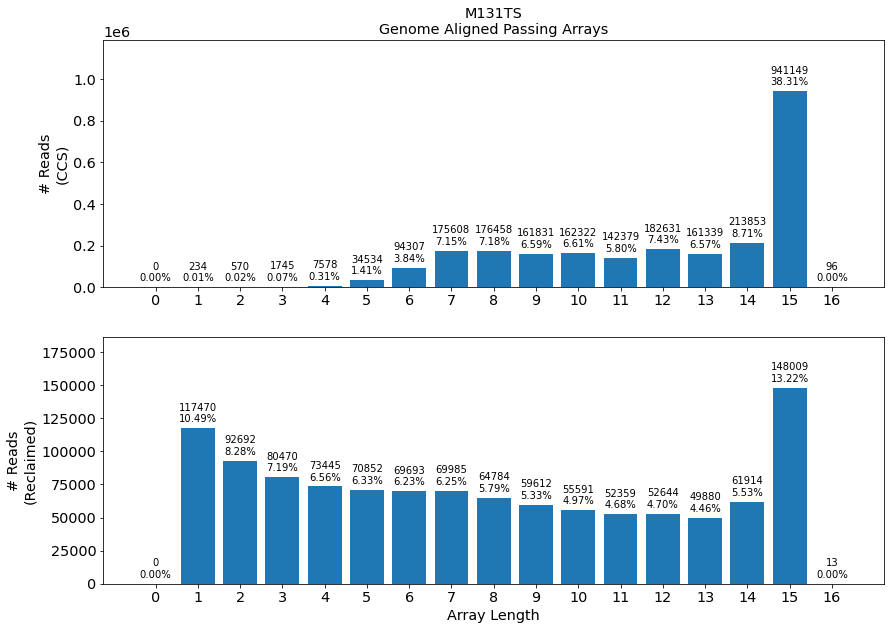

In [322]:
m131_ccs_lengths = []
m131_reclaimed_lengths = []
for k,v in m131_zmw_read_count_dict.items():
    if k in m131_ccs_zmws:
        m131_ccs_lengths.append(v)
    else:
        m131_reclaimed_lengths.append(v)
        
m131_ccs_lengths = np.array(m131_ccs_lengths)
m131_reclaimed_lengths = np.array(m131_reclaimed_lengths)

print(len(m131_zmw_read_count_dict))

a = m131_ccs_lengths
print("CCS:")
print(f"\t{np.min(a)}")
print(f"\t{np.max(a)}")
print(f"\t{np.mean(a)}")
print(f"\t{np.median(a)}")
print(f"\t{np.std(a)}")

a = m131_reclaimed_lengths
print("Reclaimed:")
print(f"\t{np.min(a)}")
print(f"\t{np.max(a)}")
print(f"\t{np.mean(a)}")
print(f"\t{np.median(a)}")
print(f"\t{np.std(a)}")

# Get CCS and Reclaimed histogram data:
m131_ccs_hist_bins = np.arange(int(np.max(m131_ccs_lengths))+2)
m131_ccs_count_hist, _ = np.histogram(m131_ccs_lengths, bins=m131_ccs_hist_bins-.5)
m131_ccs_hist_bins = m131_ccs_hist_bins[:-1]

m131_reclaimed_hist_bins = np.arange(int(np.max(m131_reclaimed_lengths))+2)
m131_reclaimed_count_hist, _ = np.histogram(m131_reclaimed_lengths, bins=m131_reclaimed_hist_bins-.5)
m131_reclaimed_hist_bins = m131_reclaimed_hist_bins[:-1]

fig, axs = plt.subplots(2, 1)

h = axs[0].bar(m131_ccs_hist_bins, m131_ccs_count_hist, label="ccs")
h = axs[1].bar(m131_reclaimed_hist_bins, m131_reclaimed_count_hist, label="reclaimed")

# Increase ymax:
for ax in axs:
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax*1.2)

ymin, ymax = axs[0].get_ylim()
num_reads = len(m131_ccs_lengths)
yoff = (ymax-ymin) * .025
for l, c in zip(m131_ccs_hist_bins, m131_ccs_count_hist):
    h = axs[0].text(l, c+yoff, f"{c}\n{c/num_reads*100:.02f}%", horizontalalignment='center')
    
ymin, ymax = axs[1].get_ylim()
num_reads = len(m131_reclaimed_lengths)
yoff = (ymax-ymin) * .025
for l, c in zip(m131_reclaimed_hist_bins, m131_reclaimed_count_hist):
    h = axs[1].text(l, c+yoff, f"{c}\n{c/num_reads*100:.02f}%", horizontalalignment='center')

axs[0].set_xticks(m131_ccs_hist_bins)
axs[1].set_xticks(m131_reclaimed_hist_bins)
axs[0].set_ylabel("# Reads\n(CCS)")
axs[1].set_ylabel("# Reads\n(Reclaimed)")
axs[1].set_xlabel("Array Length")

axs[0].set_title("M131TS\nGenome Aligned Passing Arrays")

# axs[0].set_yscale("log")
# axs[1].set_yscale("log")

fig.show()

In [422]:
m131_full_stats = get_full_transcript_mapping_tallies(m131_genome_aligned_bam_file, m131_ccs_zmws, m131_zmw_read_count_dict, m131_total_alignments)

In [423]:
import pickle
pickle.dump(m131_full_stats, open("m131_full_stats_with_unmapped.pickle", 'wb'))

In [424]:
m131_full_stats = pickle.load(open("m131_full_stats_with_unmapped.pickle", 'rb'))

In [332]:
print_full_tx_map_stats(m131_full_stats)

corrected:
                                         0      1       2        3         4         5          6          7          8
unmapped                                40     47      94      197       631      1597       2797       3152       3188
mq0                                      1      8      23      128       639      2597       6166       7518       7876
no_poly_a                                0      0       0        0         0         0          0          0          0
no_adapters                             26    169     355     2319     15267     39316      76598      97700      85452
no_poly_a_or_adapters                    0      0       0        0         0         0          0          0          0
good_mq_has_correct_annotations        167    916    4763    27668    156133    522332    1143695    1303294    1359963
ma_no_mas_seq                           34    171     361     2313     15232     39244      76628      97859      85599
ma_no_10x                    

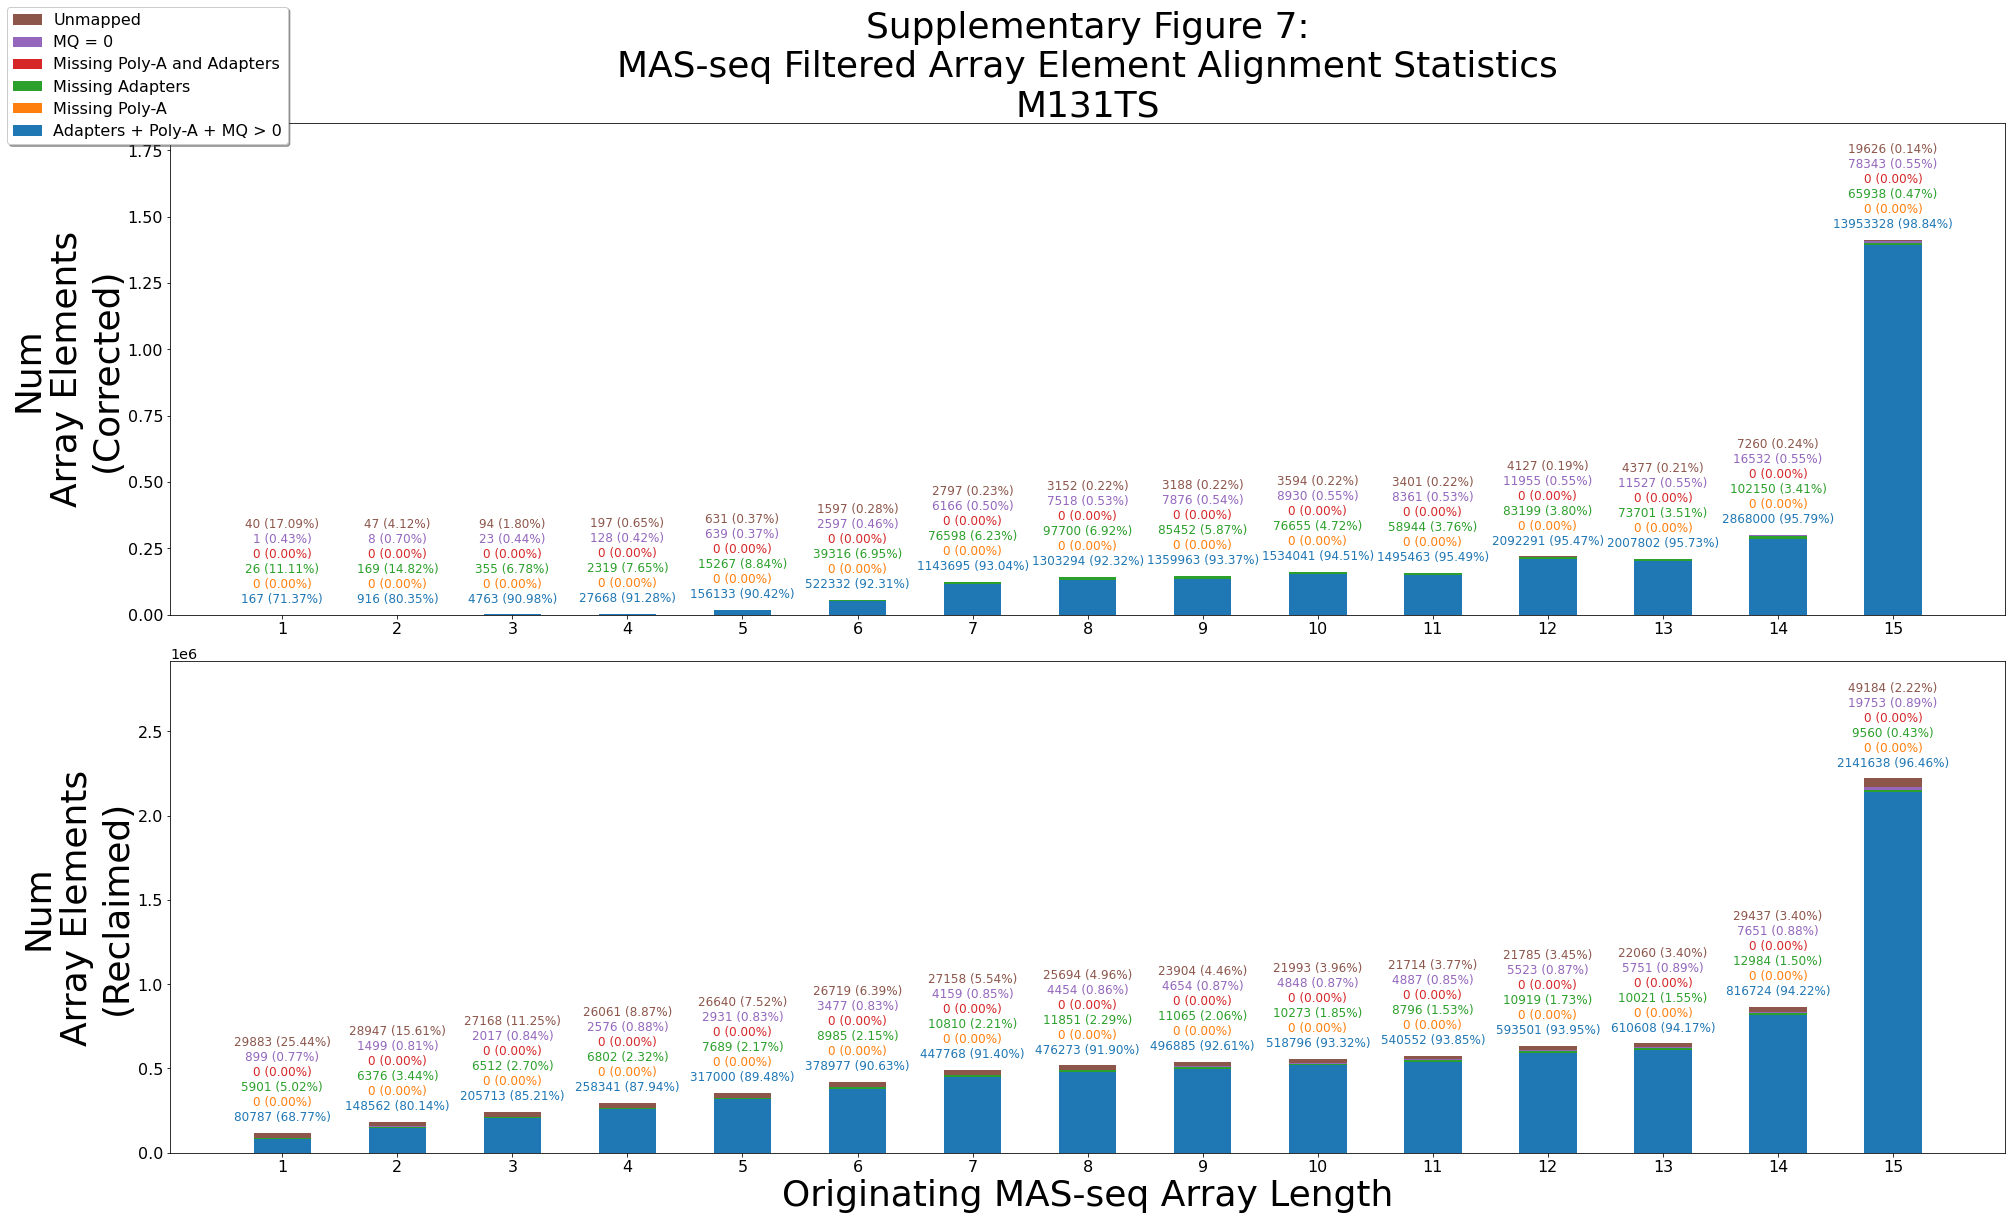

In [436]:
plot_supp_figure_7_full_stats(m131_full_stats, sample_name="M131TS")

In [481]:
counts = np.zeros((15, 9))
for t in ["corrected", "reclaimed"]:
    for i, stats in enumerate(m131_full_stats[t]):
        if i >= 15:
            break
        counts[i][0] += stats['unmapped']
        counts[i][1] += stats['mq0']
        counts[i][2] += stats['no_poly_a']
        counts[i][3] += stats['no_adapters']
        counts[i][4] += stats['no_poly_a_or_adapters']
        counts[i][5] += stats['good_mq_has_correct_annotations']
        counts[i][6] += stats['ma_no_mas_seq']
        counts[i][7] += stats['ma_no_10x']
        counts[i][8] += stats['ma_no_3p']
        
m131ts_overall_total = np.sum(counts[:, 0:6])
m131ts_good_total = np.sum(counts[:, 5])
m131ts_good_percent = 100 * m131ts_good_total/m131ts_overall_total

print(f"M131TS total good array element percentage: {m131ts_good_percent:2.2f}%")

M131TS total good array element percentage: 95.76%


In [82]:
# get_transcript_mapping_tallies(m131_genome_aligned_bam_file, m131_ccs_zmws, m131_zmw_array_length_dict, m131_total_alignments)

In [333]:
# plot_supp_figure_7(m131_stats, "M131TS") 

In [334]:
# __  __   _ _________    _____ ____  
#|  \/  | / |___ /___ \  |_   _/ ___| 
#| |\/| | | | |_ \ __) |   | | \___ \ 
#| |  | | | |___) / __/    | |  ___) |
#|_|  |_| |_|____/_____|   |_| |____/ 
#                                     

# Read in the pickles:
m132_array_stats_dict = pickle.load(open("/home/jovyan/work/juffowup/covid-19-aziz/metrics2/M132TS_MAS_15x/pickles_from_run/M132TS_MAS_15x_array_stats_dict.pickle", "rb"))
m132_ccs_zmws = pickle.load(open("/home/jovyan/work/juffowup/covid-19-aziz/metrics2/M132TS_MAS_15x/pickles_from_run/M132TS_MAS_15x_ccs_zmws.pickle", "rb"))

# convert zmw_list and array_length_list into a map:
m132_zmw_array_length_dict = {z:l for z,l in zip(m132_array_stats_dict['Longbow Passed'][ZMWS], m132_array_stats_dict['Longbow Passed'][ARRAY_LENGTHS])}

# Get bam file to read:
m132_genome_aligned_bam_file = "/home/jovyan/work/juffowup/covid-19-aziz/metrics2/M132TS_MAS_15x/pickles_from_run/M132TS_MAS_15x_array_elements_longbow_extracted_genome_aligned.bam"

m132_total_alignments = 38559693 + 22511979

In [335]:
# m132_zmw_read_count_dict = create_zmw_read_count_dict(m132_genome_aligned_bam_file, m132_total_alignments) 

In [ ]:
import pickle
m132_zmw_read_count_dict = {k:v for k,v in sorted(m132_zmw_read_count_dict.items())}
pickle.dump(m132_zmw_read_count_dict, open("m132_zmw_read_count_dict.pickle", 'wb'))

In [ ]:
m132_zmw_read_count_dict = pickle.load(open("m132_zmw_read_count_dict.pickle", 'rb'))

In [337]:
below_1 = []
above_15 = []
for k,v in m132_zmw_read_count_dict.items():
    if v < 1:
        below_1.append((k,v))
    elif v > 15:
        above_15.append((k,v))

if len(below_1) > 0:
    print("Below 1:")
    print("ZMW\tLENGTH")
    for k,v in below_1:
        print(f"{k}\t{v}")
        
if len(above_15) > 0:
    print("Above 15:")
    print("ZMW\tLENGTH")
    for k,v in above_15:
        print(f"{k}\t{v}")

Above 15:
ZMW	LENGTH
199473	16
1051043	16
1246993	16
2950659	16
7012486	16
7801109	16
8782077	16
9111795	16
15990960	16
16778866	16
18285912	16
19466814	16
20186950	16
21169662	16
22940071	16
23659129	16
31129904	16
32048285	16
33490302	16
35652708	16
38668346	16
39847353	16
46008221	16
46664149	16
47055244	16
50004120	16
54265108	16
54462759	16
55968922	16
57019211	16
58263144	16
60492340	16
61932822	16
62458139	16
66715769	16
68160333	16
71762163	16
73335391	16
75762437	16
80087022	16
82380884	16
86706098	16
88672271	16
88867207	16
89850283	16
90571338	16
91685445	16
92472158	16
93521952	16
94962834	16
96733912	16
97453019	16
98370746	16
98502205	16
99747919	16
100402927	16
104334925	16
108724295	16
108792627	16
109184586	16
109248624	16
110886922	16
112198260	16
112461717	16
112722097	16
113706643	16
114755047	16
116197078	16
116785791	16
120586241	16
120981029	16
121897249	16
122095528	16
122946884	16
126421480	16
127206031	16
131205375	16
132319465	16
132711869	16
133106124	16
134

2993819
CCS:
	1
	16
	14.0327299769113
	15.0
	1.5279020657426672
Reclaimed:
	1
	16
	7.563776158253159
	7.0
	4.996498975509703


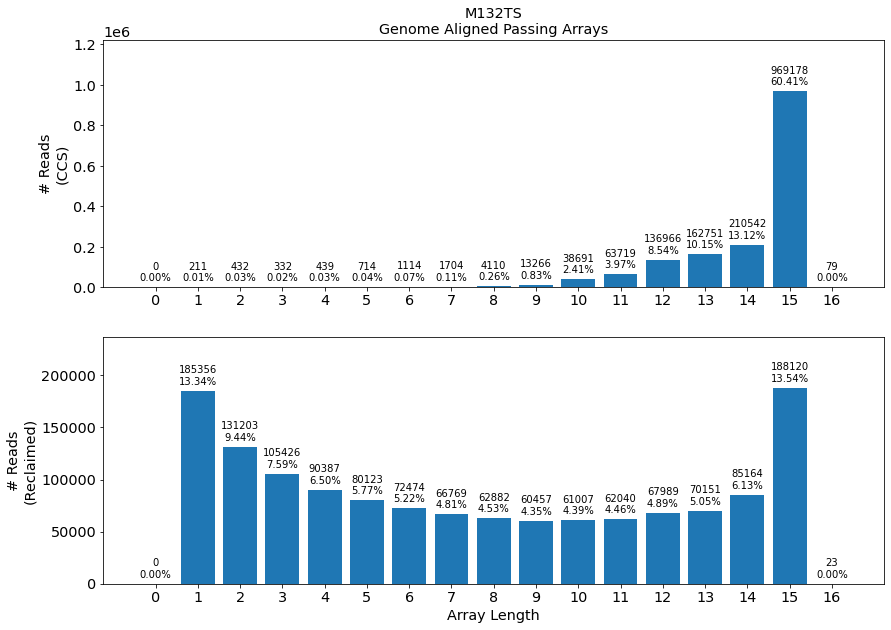

In [338]:
m132_ccs_lengths = []
m132_reclaimed_lengths = []
for k,v in m132_zmw_read_count_dict.items():
    if k in m132_ccs_zmws:
        m132_ccs_lengths.append(v)
    else:
        m132_reclaimed_lengths.append(v)
        
m132_ccs_lengths = np.array(m132_ccs_lengths)
m132_reclaimed_lengths = np.array(m132_reclaimed_lengths)

print(len(m132_zmw_read_count_dict))

a = m132_ccs_lengths
print("CCS:")
print(f"\t{np.min(a)}")
print(f"\t{np.max(a)}")
print(f"\t{np.mean(a)}")
print(f"\t{np.median(a)}")
print(f"\t{np.std(a)}")

a = m132_reclaimed_lengths
print("Reclaimed:")
print(f"\t{np.min(a)}")
print(f"\t{np.max(a)}")
print(f"\t{np.mean(a)}")
print(f"\t{np.median(a)}")
print(f"\t{np.std(a)}")

# Get CCS and Reclaimed histogram data:
m132_ccs_hist_bins = np.arange(int(np.max(m132_ccs_lengths))+2)
m132_ccs_count_hist, _ = np.histogram(m132_ccs_lengths, bins=m132_ccs_hist_bins-.5)
m132_ccs_hist_bins = m132_ccs_hist_bins[:-1]

m132_reclaimed_hist_bins = np.arange(int(np.max(m132_reclaimed_lengths))+2)
m132_reclaimed_count_hist, _ = np.histogram(m132_reclaimed_lengths, bins=m132_reclaimed_hist_bins-.5)
m132_reclaimed_hist_bins = m132_reclaimed_hist_bins[:-1]

fig, axs = plt.subplots(2, 1)

h = axs[0].bar(m132_ccs_hist_bins, m132_ccs_count_hist, label="ccs")
h = axs[1].bar(m132_reclaimed_hist_bins, m132_reclaimed_count_hist, label="reclaimed")

# Increase ymax:
for ax in axs:
    ymin, ymax = ax.get_ylim()
    ax.set_ylim(ymin, ymax*1.2)

ymin, ymax = axs[0].get_ylim()
num_reads = len(m132_ccs_lengths)
yoff = (ymax-ymin) * .025
for l, c in zip(m132_ccs_hist_bins, m132_ccs_count_hist):
    h = axs[0].text(l, c+yoff, f"{c}\n{c/num_reads*100:.02f}%", horizontalalignment='center')
    
ymin, ymax = axs[1].get_ylim()
num_reads = len(m132_reclaimed_lengths)
yoff = (ymax-ymin) * .025
for l, c in zip(m132_reclaimed_hist_bins, m132_reclaimed_count_hist):
    h = axs[1].text(l, c+yoff, f"{c}\n{c/num_reads*100:.02f}%", horizontalalignment='center')

axs[0].set_xticks(m132_ccs_hist_bins)
axs[1].set_xticks(m132_reclaimed_hist_bins)
axs[0].set_ylabel("# Reads\n(CCS)")
axs[1].set_ylabel("# Reads\n(Reclaimed)")
axs[1].set_xlabel("Array Length")

axs[0].set_title("M132TS\nGenome Aligned Passing Arrays")

# axs[0].set_yscale("log")
# axs[1].set_yscale("log")

fig.show()

In [339]:
# Get our stats:
m132_full_stats = get_full_transcript_mapping_tallies(m132_genome_aligned_bam_file, m132_ccs_zmws, m132_zmw_read_count_dict, m132_total_alignments)

In [340]:
import pickle
pickle.dump(m132_full_stats, open("m132_full_stats_with_unmapped.pickle", 'wb'))

In [341]:
print_full_tx_map_stats(m132_full_stats)

corrected:
                                         0      1      2       3       4       5        6        7         8
unmapped                                 8      9     13       5      32      32       51      103       387
mq0                                      1      7      5       8      22      44       68      145       520
no_poly_a                                0      0      0       0       0       0        0        0         0
no_adapters                             17    178    148     175     212     196      325     1257      4929
no_poly_a_or_adapters                    0      0      0       0       0       0        0        0         0
good_mq_has_correct_annotations        185    670    830    1568    3304    6412    11484    31375    113558
ma_no_mas_seq                           14    177    150     172     210     193      325     1260      4923
ma_no_10x                                0      0      0       0       0       0        0        0         0
ma_no_3p

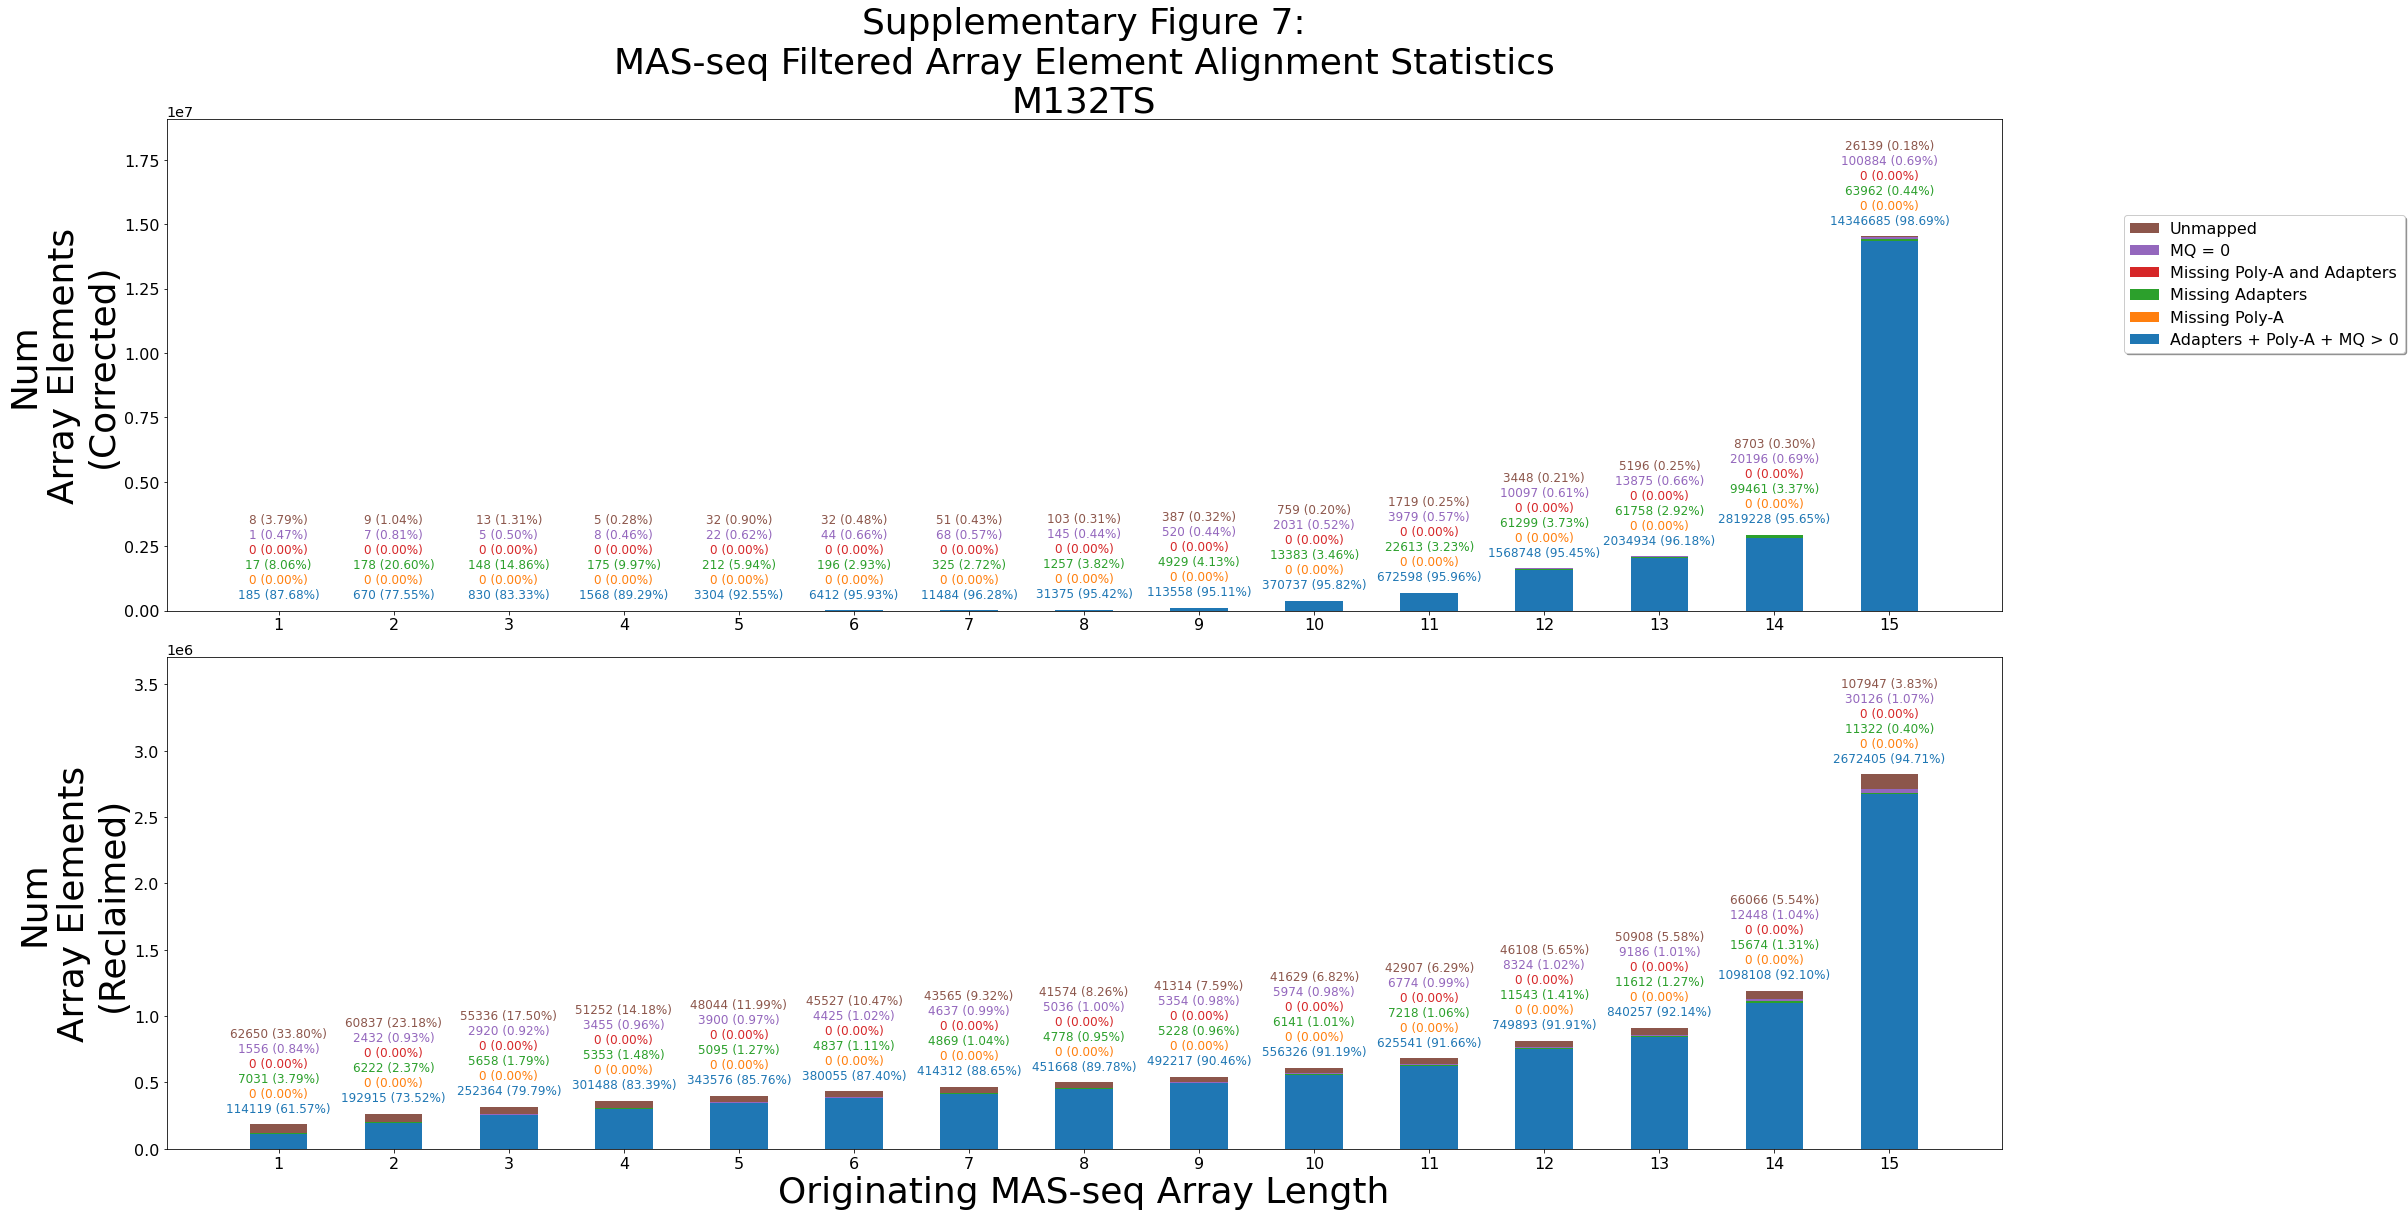

In [432]:
plot_supp_figure_7_full_stats(m132_full_stats, sample_name="M132TS")

In [482]:
counts = np.zeros((15, 9))
for t in ["corrected", "reclaimed"]:
    for i, stats in enumerate(m132_full_stats[t]):
        if i >= 15:
            break
        counts[i][0] += stats['unmapped']
        counts[i][1] += stats['mq0']
        counts[i][2] += stats['no_poly_a']
        counts[i][3] += stats['no_adapters']
        counts[i][4] += stats['no_poly_a_or_adapters']
        counts[i][5] += stats['good_mq_has_correct_annotations']
        counts[i][6] += stats['ma_no_mas_seq']
        counts[i][7] += stats['ma_no_10x']
        counts[i][8] += stats['ma_no_3p']
        
m132ts_overall_total = np.sum(counts[:, 0:6])
m132ts_good_total = np.sum(counts[:, 5])
m132ts_good_percent = 100 * m132ts_good_total/m132ts_overall_total

print(f"M132TS total good array element percentage: {m132ts_good_percent:2.2f}%")

M132TS total good array element percentage: 95.30%


In [483]:
print(f'Mean good percentage: {(m131ts_good_percent+m132ts_good_percent)/2:2.2f}')

Mean good percentage: 95.53


***

## Supplmentary table 1 - Alignment metrics

In [440]:
import math

# Now get all the alignments and store them in a dict
def get_alignment_stats(aligned_array_element_bam, longbow_failed_zmws=set(), zmw_whitelist=None, invert_selection=None, whitelist_name=None, force_rebuild=False):
    
    if zmw_whitelist:
        wl_id_string = f".{whitelist_name}" if whitelist_name else ".unknown_whitelist"
    else:
        wl_id_string = ""

    get_alignment_stats_pickle_filename = os.path.splitext(os.path.basename(aligned_array_element_bam))[0] + f".get_alignment_stats{wl_id_string}.pickle"
    
    if (not force_rebuild) and os.path.exists(get_alignment_stats_pickle_filename):
        print(f"Loading alignment_stats from Pickle ({os.path.abspath(get_alignment_stats_pickle_filename)})...")
        aligned_stats = pickle.load(open(get_alignment_stats_pickle_filename, "rb"))
        print("Done!")
    else:
    
        # Part 1: Get array elements themselves:
        aligned_array_elements = dict()

        num_alignments = 0

        num_unmapped = 0
        num_multi_alignment_array_elements = 0
        num_multi_alignment_alignments = 0

        num_unmapped_passed = 0
        num_unmapped_failed = 0

        num_single_alignment_passed = 0
        num_single_alignment_failed = 0
        num_multi_alignment_passed = 0
        num_multi_alignment_failed = 0

        single_alignment_reads = set()

        aligned_stats = dict()

        with pysam.AlignmentFile(aligned_array_element_bam, "rb", check_sq=False, require_index=False) as bam_file, tqdm(desc="Processing Aligned Array Elements", unit="read") as pbar:
            for read in bam_file:

                i1 = read.query_name.find("/")
                i2 = read.query_name.find("/", i1+1)
                zmw = int(read.query_name[i1+1:i2])
                
                # Check our ZMW if we're supposed to:
                if zmw_whitelist:

                    # If we need to invert our ZMW selection, we should do so here:
                    if invert_selection:
                        if zmw in zmw_whitelist:
                            continue
                    else:
                        if zmw not in zmw_whitelist:
                            continue

                if read.is_unmapped:
                    num_unmapped += 1

                    if zmw in longbow_failed_zmws:
                        num_unmapped_failed += 1 
                    else:
                        num_unmapped_passed += 1 
                else:
                    try:
                        aligned_array_elements[read.query_name].append(read.mapping_quality)
                        if read.query_name in single_alignment_reads:
                            num_multi_alignment_array_elements += 1

                            if zmw in longbow_failed_zmws:
                                num_single_alignment_failed -= 1 
                                num_multi_alignment_failed += 1 
                            else:
                                num_single_alignment_passed -= 1 
                                num_multi_alignment_passed += 1 

                            single_alignment_reads.remove(read.query_name)

                        num_multi_alignment_alignments += 1

                    except KeyError:
                        single_alignment_reads.add(read.query_name)

                        if zmw in longbow_failed_zmws:
                            num_single_alignment_failed += 1 
                        else:
                            num_single_alignment_passed += 1 

                        aligned_array_elements[read.query_name] = [read.mapping_quality]
                pbar.update(1)
                num_alignments += 1

        # Part 2: Get stats:
        aligned_stats["single_high_quals"] = []
        aligned_stats["single_high_quals_bad"] = []
        aligned_stats["single_low_quals"] = []

        aligned_stats["multi_high_quals"] = []
        aligned_stats["multi_one_nonzero"] = 0
        aligned_stats["multi_some_nonzero"] = 0
        aligned_stats["multi_all_low_quals"] = 0

        with tqdm(desc="Processing Aligned Array Element Stats", unit="array element", total=len(aligned_array_elements)) as pbar:
            for n, qs in aligned_array_elements.items():

                i1 = n.find("/")
                i2 = n.find("/", i1+1)
                zmw = int(n[i1+1:i2])

                if len(qs) == 1:
                    if qs[0] == 0:
                        aligned_stats["single_low_quals"].append(qs[0])
                    elif zmw not in longbow_failed_zmws:
                        aligned_stats["single_high_quals"].append(qs[0])
                    else:
                        aligned_stats["single_high_quals_bad"].append(qs[0])
                else:
                    maxq = max(qs)
                    if maxq == 0:
                        aligned_stats["multi_all_low_quals"] += 1
                        pbar.update(1)
                        continue

                    if zmw not in longbow_failed_zmws:
                        aligned_stats["multi_high_quals"].append(maxq)
                        pbar.update(1)
                        continue

                    num_nonzero = 0
                    for q in qs:
                        if q != 0:
                            num_nonzero += 1

                    if num_nonzero == 1:
                        aligned_stats["multi_one_nonzero"] += 1
                    else:
                        aligned_stats["multi_some_nonzero"] += 1

                pbar.update(1)

        # Part 3: Consolidate stats:
        aligned_stats["single_high_quals"] = np.array(aligned_stats["single_high_quals"])
        aligned_stats["single_high_quals_bad"] = np.array(aligned_stats["single_high_quals_bad"])
        aligned_stats["single_low_quals"] = np.array(aligned_stats["single_low_quals"])
        aligned_stats["multi_high_quals"] = np.array(aligned_stats["multi_high_quals"])
        
        aligned_stats["total_array_elements"] = len(aligned_array_elements) + num_unmapped
        aligned_stats["num_aligned_array_elements"] = len(aligned_array_elements)
        aligned_stats["num_alignments"] = num_alignments
        aligned_stats["num_unmapped"] = num_unmapped
        aligned_stats["num_single_alignment_array_elements"] = len(single_alignment_reads)
        aligned_stats["num_multi_alignment_array_elements"] = num_multi_alignment_array_elements
        aligned_stats["num_multi_alignment_alignments"] = num_multi_alignment_alignments
        aligned_stats["num_unmapped_passed"] = num_unmapped_passed
        aligned_stats["num_unmapped_failed"] = num_unmapped_failed
        aligned_stats["num_single_alignment_passed"] = num_single_alignment_passed
        aligned_stats["num_single_alignment_failed"] = num_single_alignment_failed
        aligned_stats["num_multi_alignment_passed"] = num_multi_alignment_passed
        aligned_stats["num_multi_alignment_failed"] = num_multi_alignment_failed
        
        print("Pickling aligned_stats ...", end="\t")
        pickle.dump(aligned_stats, open(get_alignment_stats_pickle_filename, "wb"))
        print("done!")
    
    return aligned_stats

def get_field_size(values):
    max_field = -np.inf 
    for f in values:
        if not isinstance(f, list) and not isinstance(f, (list, np.ndarray)):
            if f > max_field:
                max_field = f
    nd = int(np.ceil(np.log10(max_field)))
    return nd

def print_stats(a, label=None):
    
    prec = ".4f"
    int_types = {
        int,
        np.int,
        np.intc,
        np.intp,
        np.int0,
        np.int8,
        np.int16,
        np.int32,
        np.int64,
        np.integer,
        float,
        np.uint,
        np.uintc,
        np.uintp,
        np.uint0,
        np.uint8,
        np.uint16,
        np.uint32,
        np.uint64,
        np.unsignedinteger
    }
    
    quantiles_to_calc = [0.1, 0.25, 0.75, 0.9]
    quantiles = np.quantile(a, quantiles_to_calc)
     
    # Construct our data dictionary in a way that will display our stats in
    # a sensical manner:
    data = {
        "#" : len(a),
        "Min" : np.min(a),
        "Max" : np.max(a),
    }
    for i in range(int(len(quantiles_to_calc)/2)):
        q = quantiles_to_calc[i]
        v = quantiles[i]
        data[f"Q{int(q*100)}"] = v
 
    data["Mean"] = np.mean(a)
    data["Median"] = np.median(a)
    
    for i in range(int(len(quantiles_to_calc)/2), len(quantiles_to_calc)):
        q = quantiles_to_calc[i]
        v = quantiles[i]
        data[f"Q{int(q*100)}"] = v
        
    data["Stdev"] = np.std(a)
    
    nd = get_field_size(data.values())
    
    field_width = max([len(k) for k in data.keys()])
    
    if label:
        print(f"{label}:")
        print("-" * (len(label) + 1))
        
    for k,v in data.items():
        if type(v) in int_types:
            print(f"{k:{field_width}}: {v:{nd}}")
        else:
            nfd = int(np.ceil(np.log10(v)))
            spacer = " " * (nd - nfd)
            print(f"{k:{field_width}}: {spacer}{v:{prec}}")

# Get the max field so we can make our output pretty:
def print_aligned_stats(aligned_stats):
    
    nd = get_field_size(aligned_stats.values())
    prec = ".4f"

    print(f"Total Alignments:                                   {aligned_stats['num_alignments']:{nd}}")
    print(f"Total Array Elements:                               {aligned_stats['total_array_elements']:{nd}}")
    print(f"Num Aligned Array Elements:                         {aligned_stats['num_aligned_array_elements']:{nd}} ({100*aligned_stats['num_aligned_array_elements']/aligned_stats['total_array_elements']:{prec}}% of total)")
    print()
    print(f"Num Unmapped Array Elements:                        {aligned_stats['num_unmapped']:{nd}} ({100*aligned_stats['num_unmapped']/aligned_stats['total_array_elements']:{prec}}% of total)")
    print(f"Num Unmapped Longbow Passing Array Elements:        {aligned_stats['num_unmapped_passed']:{nd}} ({100*aligned_stats['num_unmapped_passed']/aligned_stats['num_unmapped']:{prec}}% of unmapped)")
    print(f"Num Unmapped Longbow Failing Array Elements:        {aligned_stats['num_unmapped_failed']:{nd}} ({100*aligned_stats['num_unmapped_failed']/aligned_stats['num_unmapped']:{prec}}% of unmapped)")
    print()
    print(f"Num Single Alignment Array Elements:                    {aligned_stats['num_single_alignment_array_elements']:{nd}} ({100*aligned_stats['num_single_alignment_array_elements']/aligned_stats['num_aligned_array_elements']:{prec}}% of mapped elements)")
    print(f"Num Longbow Passing Single Alignment Array Elements:    {aligned_stats['num_single_alignment_passed']:{nd}} ({100*aligned_stats['num_single_alignment_passed']/aligned_stats['num_single_alignment_array_elements']:{prec}}% of 1a elements)")
    print(f"Num Longbow Failing Single Alignment Array Elements:    {aligned_stats['num_single_alignment_failed']:{nd}} ({100*aligned_stats['num_single_alignment_failed']/aligned_stats['num_single_alignment_array_elements']:{prec}}% of 1a elements)")
    print()
    print(f"Num Multi-Alignment Array Elements:                 {aligned_stats['num_multi_alignment_array_elements']:{nd}} ({100*aligned_stats['num_multi_alignment_array_elements']/aligned_stats['num_aligned_array_elements']:{prec}}% of mapped elements)")
    print(f"Num Multi-Alignment Array Element Alignments:       {aligned_stats['num_multi_alignment_alignments']:{nd}} ({100*aligned_stats['num_multi_alignment_alignments']/aligned_stats['num_alignments']:{prec}}% of alignments)")
    print(f"Num Longbow Passing Multi-Alignment Array Elements: {aligned_stats['num_multi_alignment_passed']:{nd}} ({100*aligned_stats['num_multi_alignment_passed']/aligned_stats['num_multi_alignment_array_elements']:{prec}}% of 2p elements)")
    print(f"Num Longbow Failing Multi-Alignment Array Elements: {aligned_stats['num_multi_alignment_failed']:{nd}} ({100*aligned_stats['num_multi_alignment_failed']/aligned_stats['num_multi_alignment_array_elements']:{prec}}% of 2p elements)")

    
def print_mq_stats(aligned_stats):

    nd = get_field_size(aligned_stats.values())
    prec = ".4f"

    # sa_mean_mq = np.mean(extra_virgin_reads)
    # sa_hq_p_mean_mq = np.mean(single_high_quals)
    # sa_hq_f_mean_mq = np.mean(single_high_quals_bad)

    print(f"Total Array Elements:                 {aligned_stats['total_array_elements']:{nd}}")
    print(f"Single Alignments:                    {aligned_stats['num_single_alignment_array_elements']:{nd}} ({100*aligned_stats['num_single_alignment_array_elements']/aligned_stats['total_array_elements']:{prec}}% of total)")
    print(f"    High Qual (passing):              {len(aligned_stats['single_high_quals']):{nd}} ({100*len(aligned_stats['single_high_quals'])/aligned_stats['num_single_alignment_array_elements']:{prec}}% of single alignment array elements)")
    print(f"    High Qual (failing):              {len(aligned_stats['single_high_quals_bad']):{nd}} ({100*len(aligned_stats['single_high_quals_bad'])/aligned_stats['num_single_alignment_array_elements']:{prec}}% of single alignment array elements)")
    print(f"    mq = 0:                           {len(aligned_stats['single_low_quals']):{nd}} ({100*len(aligned_stats['single_low_quals'])/aligned_stats['num_single_alignment_array_elements']:{prec}}% of single alignment array elements)")
    print(f"Array Elements with Multi-Alignments: {aligned_stats['num_multi_alignment_array_elements']:{nd}} ({100*aligned_stats['num_multi_alignment_array_elements']/aligned_stats['total_array_elements']:{prec}}% of total)")
    print(f"    exactly 1 High Qual (passing):    {len(aligned_stats['multi_high_quals']):{nd}} ({100*len(aligned_stats['multi_high_quals'])/aligned_stats['num_multi_alignment_array_elements']:{prec}}% of multi alignment array elements)")
    print(f"    >1 High Qual (failing):           {aligned_stats['multi_some_nonzero']:{nd}} ({100*aligned_stats['multi_some_nonzero']/aligned_stats['num_multi_alignment_array_elements']:{prec}}% of multi alignment array elements)")
    print(f"    1 High Qual (failing):            {aligned_stats['multi_one_nonzero']:{nd}} ({100*aligned_stats['multi_one_nonzero']/aligned_stats['num_multi_alignment_array_elements']:{prec}}% of multi alignment array elements)")


In [449]:
m131_gencode_tx_aligned_bam_file = "/home/jovyan/work/juffowup/covid-19-aziz/metrics2/M131TS_MAS_15x/M131TS_Extracted_Tx_Reads_aligned_reads.bam"
m131ts_gencode_tx_aligned_stats = get_alignment_stats(m131_gencode_tx_aligned_bam_file)

In [444]:
import pickle
pickle.dump(m131ts_gencode_tx_aligned_stats, open("/home/jovyan/work/juffowup/covid-19-aziz/metrics2/M131TS_MAS_15x/m131ts_gencode_tx_aligned_stats.pickle", 'wb'))

In [445]:
print("===========================")
print(f"M131TS GENCODE 37 Transcriptome Aligned Reads")
print("===========================")
print()
print_aligned_stats(m131ts_gencode_tx_aligned_stats)

print()
print(80*'-')
print()
print_mq_stats(m131ts_gencode_tx_aligned_stats)

M131TS GENCODE 37 Transcriptome Aligned Reads

Total Alignments:                                   113908120
Total Array Elements:                                38118216
Num Aligned Array Elements:                          32333909 (84.8253% of total)

Num Unmapped Array Elements:                          5784307 (15.1747% of total)
Num Unmapped Longbow Passing Array Elements:          5784307 (100.0000% of unmapped)
Num Unmapped Longbow Failing Array Elements:                0 (0.0000% of unmapped)

Num Single Alignment Array Elements:                      9013971 (27.8778% of mapped elements)
Num Longbow Passing Single Alignment Array Elements:      9013971 (100.0000% of 1a elements)
Num Longbow Failing Single Alignment Array Elements:            0 (0.0000% of 1a elements)

Num Multi-Alignment Array Elements:                  23319938 (72.1222% of mapped elements)
Num Multi-Alignment Array Element Alignments:        75789904 (66.5360% of alignments)
Num Longbow Passing Multi-Alignme

In [446]:
m132_gencode_tx_aligned_bam_file = "/home/jovyan/work/juffowup/covid-19-aziz/metrics2/M132TS_MAS_15x/LATEST/M132TS_Extracted_Tx_Reads_aligned_reads.bam"
m132ts_gencode_tx_aligned_stats = get_alignment_stats(m132_gencode_tx_aligned_bam_file)


Pickling aligned_stats ...	done!


In [447]:
import pickle
pickle.dump(m132ts_gencode_tx_aligned_stats, open("/home/jovyan/work/juffowup/covid-19-aziz/metrics2/M132TS_MAS_15x/LATEST/m132ts_gencode_tx_aligned_stats.pickle", 'wb'))

In [448]:
print("===========================")
print(f"M132TS GENCODE 37 Transcriptome Aligned Reads")
print("===========================")
print()
print_aligned_stats(m132ts_gencode_tx_aligned_stats)

print()
print(80*'-')
print()
print_mq_stats(m132ts_gencode_tx_aligned_stats)

M132TS GENCODE 37 Transcriptome Aligned Reads

Total Alignments:                                   91325470
Total Array Elements:                               33022383
Num Aligned Array Elements:                         25197327 (76.3038% of total)

Num Unmapped Array Elements:                         7825056 (23.6962% of total)
Num Unmapped Longbow Passing Array Elements:         7825056 (100.0000% of unmapped)
Num Unmapped Longbow Failing Array Elements:               0 (0.0000% of unmapped)

Num Single Alignment Array Elements:                     7924927 (31.4515% of mapped elements)
Num Longbow Passing Single Alignment Array Elements:     7924927 (100.0000% of 1a elements)
Num Longbow Failing Single Alignment Array Elements:           0 (0.0000% of 1a elements)

Num Multi-Alignment Array Elements:                 17272400 (68.5485% of mapped elements)
Num Multi-Alignment Array Element Alignments:       58303087 (63.8410% of alignments)
Num Longbow Passing Multi-Alignment Array El

***
## Consistent Segmentation Stats:

In [490]:
def get_heat_matrix_stats(ligation_heat_matrix):

    total_count = np.sum(ligation_heat_matrix)

    sub_diagonal_count = 0
    for i in range(1, ligation_heat_matrix.shape[0]):
        sub_diagonal_count += ligation_heat_matrix[i, i-1]
    off_sub_diagonal_count = total_count - sub_diagonal_count

    sub_sub_diagonal_count = 0
    for i in range(2, ligation_heat_matrix.shape[0]):
        sub_sub_diagonal_count += ligation_heat_matrix[i, i-2]

    return total_count, sub_diagonal_count, sub_sub_diagonal_count


In [492]:
m131_overall_heat_matrix_stats = get_heat_matrix_stats(m131_array_stats_dict['Overall'][LIGATION_HEAT_MATRIX])
m131_passed_heat_matrix_stats = get_heat_matrix_stats(m131_array_stats_dict['Longbow Passed'][LIGATION_HEAT_MATRIX])

m132_overall_heat_matrix_stats = get_heat_matrix_stats(m132_array_stats_dict['Overall'][LIGATION_HEAT_MATRIX])
m132_passed_heat_matrix_stats = get_heat_matrix_stats(m132_array_stats_dict['Longbow Passed'][LIGATION_HEAT_MATRIX])

print(m131_overall_heat_matrix_stats)
print(m131_passed_heat_matrix_stats)  

print()

print(m132_overall_heat_matrix_stats)
print(m132_passed_heat_matrix_stats)

(38815254, 4188, 3025)
(36286774, 0, 0)

(37007441, 6525, 5067)
(32164533, 0, 0)


In [499]:
m131_total_zmws = 5034957
m131_ccs_zmws = 2477400
m131_ccs_rejected_zmws = 2557557
m131_ccs_longbow_passed_zmws = 2456797
m131_ccs_longbow_failed_zmws = 20603
m131_rejected_longbow_passed_zmws = 1286154
m131_rejected_longbow_failed_zmws = 1171810

m132_total_zmws = 5560633
m132_ccs_zmws = 1622783
m132_ccs_rejected_zmws = 3937850
m132_ccs_longbow_passed_zmws = 1604321
m132_ccs_longbow_failed_zmws = 18462 
m132_rejected_longbow_passed_zmws = 1693831
m132_rejected_longbow_failed_zmws = 2154159

all_libraries_total_zmws = m131_total_zmws + m132_total_zmws
all_libraries_ccs_zmws = m131_ccs_zmws + m132_ccs_zmws
all_libraries_ccs_rejected_zmws = m131_ccs_rejected_zmws + m132_ccs_rejected_zmws
all_libraries_ccs_longbow_passed_zmws = m131_ccs_longbow_passed_zmws + m132_ccs_longbow_passed_zmws
all_libraries_ccs_longbow_failed_zmws = m131_ccs_longbow_failed_zmws + m132_ccs_longbow_failed_zmws
all_libraries_rejected_longbow_passed_zmws = m131_rejected_longbow_passed_zmws + m132_rejected_longbow_passed_zmws
all_libraries_rejected_longbow_failed_zmws = m131_rejected_longbow_failed_zmws + m132_rejected_longbow_failed_zmws

def print_consistency_stats(sample, 
                            num_zmws, 
                            num_ccs_zmws, 
                            num_rejected_zmws, 
                            num_ccs_longbow_passed_zmws, 
                            num_ccs_longbow_failed_zmws,
                            num_rejected_longbow_passed_zmws,
                            num_rejected_longbow_failed_zmws):
    
    tot = 100*(num_ccs_longbow_passed_zmws + num_rejected_longbow_passed_zmws)/num_zmws
    ccs = 100*(num_ccs_longbow_passed_zmws)/num_ccs_zmws
    rej = 100*(num_rejected_longbow_passed_zmws)/num_rejected_zmws
    
    print(f"{sample}: total % passed: {100*(num_ccs_longbow_passed_zmws + num_rejected_longbow_passed_zmws)/num_zmws:.1f}%")
    print(f"{sample}: ccs % passed: {100*(num_ccs_longbow_passed_zmws)/num_ccs_zmws:.1f}%")
    print(f"{sample}: ccs rejected % passed: {100*(num_rejected_longbow_passed_zmws)/num_rejected_zmws:.1f}%")
    
print_consistency_stats("M131TS", m131_total_zmws, m131_ccs_zmws, m131_ccs_rejected_zmws, m131_ccs_longbow_passed_zmws, m131_ccs_longbow_failed_zmws, m131_rejected_longbow_passed_zmws, m131_rejected_longbow_failed_zmws)
print()
print_consistency_stats("M132TS", m132_total_zmws, m132_ccs_zmws, m132_ccs_rejected_zmws, m132_ccs_longbow_passed_zmws, m132_ccs_longbow_failed_zmws, m132_rejected_longbow_passed_zmws, m132_rejected_longbow_failed_zmws)
print()
print_consistency_stats("Both Libraries", all_libraries_total_zmws, all_libraries_ccs_zmws, all_libraries_ccs_rejected_zmws, all_libraries_ccs_longbow_passed_zmws, all_libraries_ccs_longbow_failed_zmws, all_libraries_rejected_longbow_passed_zmws, all_libraries_rejected_longbow_failed_zmws)

74.3% of reads ()
M131TS: total % passed: 74.3%
M131TS: ccs % passed: 99.2%
M131TS: ccs rejected % passed: 50.3%

59.3% of reads ()
M132TS: total % passed: 59.3%
M132TS: ccs % passed: 98.9%
M132TS: ccs rejected % passed: 43.0%

66.5% of reads ()
Both Libraries: total % passed: 66.5%
Both Libraries: ccs % passed: 99.0%
Both Libraries: ccs rejected % passed: 45.9%


***
## Array Length Distribution of all Passed Reads:

In [501]:
m131_passed_zmw_read_count_dict = create_zmw_read_count_dict("/home/jovyan/work//juffowup/covid-19-aziz/metrics2/M131TS_MAS_15x/M131TS_MAS_15x_annotated_array_elements.bam")

In [502]:
pickle.dump(m131_passed_zmw_read_count_dict, open("m131_passed_zmw_read_count_dict.pickle", 'wb'))

In [529]:
m131_passed_array_length_count_dict = dict()
with pysam.AlignmentFile("/home/jovyan/work/juffowup/covid-19-aziz/metrics2/M131TS_MAS_15x/M131TS_MAS_15x_all_longbow_passed.bam", "rb", check_sq=False, require_index=False) as bam_file, tqdm(desc="Processing Passed Reads", unit="read") as pbar:
    for read in bam_file:
        zmw = int(read.get_tag("zm"))
        l = m131_passed_zmw_read_count_dict[zmw]
        try:
            m131_passed_array_length_count_dict[l] += 1
        except KeyError:
            m131_passed_array_length_count_dict[l] = 1
        pbar.update(1)

In [533]:
tot = sum(m131_passed_array_length_count_dict.values())
for k,v in sorted(m131_passed_array_length_count_dict.items()):
    print(f"{k}\t{v}\t({100*v/tot:.2f}%)")

1	5637	(0.15%)
2	190979	(5.10%)
3	119217	(3.19%)
4	99222	(2.65%)
5	109225	(2.92%)
6	161912	(4.33%)
7	238801	(6.38%)
8	263920	(7.05%)
9	233875	(6.25%)
10	228478	(6.10%)
11	198628	(5.31%)
12	244066	(6.52%)
13	213770	(5.71%)
14	269539	(7.20%)
15	1165682	(31.14%)


In [503]:
m132_passed_zmw_read_count_dict = create_zmw_read_count_dict("/home/jovyan/work/juffowup/covid-19-aziz/metrics2/M132TS_MAS_15x/LATEST/M132TS_MAS_15x_annotated_array_elements.bam")

In [504]:
pickle.dump(m132_passed_zmw_read_count_dict, open("m132_passed_zmw_read_count_dict.pickle", 'wb'))

In [534]:
m132_passed_array_length_count_dict = dict()
with pysam.AlignmentFile("/home/jovyan/work/juffowup/covid-19-aziz/metrics2/M132TS_MAS_15x/LATEST/M132TS_MAS_15x_all_longbow_passed.bam", "rb", check_sq=False, require_index=False) as bam_file, tqdm(desc="Processing Passed Reads", unit="read") as pbar:
    for read in bam_file:
        zmw = int(read.get_tag("zm"))
        l = m132_passed_zmw_read_count_dict[zmw]
        try:
            m132_passed_array_length_count_dict[l] += 1
        except KeyError:
            m132_passed_array_length_count_dict[l] = 1
        pbar.update(1)

In [535]:
tot = sum(m132_passed_array_length_count_dict.values())
for k,v in sorted(m132_passed_array_length_count_dict.items()):
    print(f"{k}\t{v}\t({100*v/tot:.2f}%)")

1	9703	(0.29%)
2	333704	(10.12%)
3	182638	(5.54%)
4	131253	(3.98%)
5	106234	(3.22%)
6	91473	(2.77%)
7	81563	(2.47%)
8	76461	(2.32%)
9	78608	(2.38%)
10	100254	(3.04%)
11	120099	(3.64%)
12	208356	(6.32%)
13	235175	(7.13%)
14	283450	(8.59%)
15	1259181	(38.18%)
